In [1]:
# Library to suppress warnings 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

In [3]:
#load data

data = pd.read_csv('/content/office_supplies.csv')
data.head(10)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,NaN
5,CA-2016-139808,2016-10-07,Standard Class,West,OFF-FA-10001883,Office Supplies,Fasteners,"Alliance Super-Size Bands, Assorted Sizes",93.360,12,0.0,NaN
6,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-ST-10002756,Office Supplies,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",541.240,4,0.0,NaN
7,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,106.320,3,0.0,NaN
8,CA-2015-110863,2015-11-17,Standard Class,Central,FUR-CH-10002073,Furniture,Chairs,Hon Olson Stacker Chairs,1323.900,5,0.0,NaN
9,CA-2014-127859,2014-03-17,Second Class,East,OFF-PA-10003641,Office Supplies,Paper,Xerox 1909,126.624,6,0.2,NaN


In [4]:
#check for column type  and missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


In [5]:
#data.duplicated(subset=['Order ID'])

In [6]:
#summary statistic of numerical columns

data.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,8000.000000
mean,229.854588,3.789553,0.156218,28.134233
std,623.276194,2.225220,0.206456,227.328814
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.814700
50%,54.480000,3.000000,0.200000,8.765100
75%,209.940000,5.000000,0.200000,29.950500
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#convert columns with object type to catgorical type
data['Ship Mode'] = data['Ship Mode'].astype('category')
data['Region'] = data['Region'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')

#convert order date column object type to date type
data["Order Date"] = pd.to_datetime(data[ "Order Date"])

#create a column for price if there was 0 discount
data['priceb4discount'] = np.where(data['Discount'] > 0, data['Sales']/(1-data['Discount']), data['Sales'])

#round price before discount to 2 decimal places
data['priceb4discount'] = data['priceb4discount'].round (decimals =2)

#convert the date column object type to datetime type
data["Order Date"] = pd.to_datetime (data[ "Order Date"])

#create columns for order year, month, day and day_of_week
data['Ord_year'] = data['Order Date'].dt.year
data['Ord_month'] = data['Order Date'].dt.month_name()
data['Ord_day'] = data['Order Date'].dt.day
data['Ord_day_of_week'] = data['Order Date'].dt.day_name()

In [8]:
#split and convert the Order Date  to year, month, day_of_week and their format to category 

data['Ord_year'] = data['Ord_year'].astype('category')
data['Ord_month'] = data['Ord_month'].astype('category')
data['Ord_day_of_week'] = data['Ord_day_of_week'].astype('category')

In [9]:
#recheck data types after conversion
data.dtypes

Order ID                   object
Order Date         datetime64[ns]
Ship Mode                category
Region                   category
Product ID                 object
Category                 category
Sub-Category             category
Product Name               object
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
priceb4discount           float64
Ord_year                 category
Ord_month                category
Ord_day                     int64
Ord_day_of_week          category
dtype: object

In [10]:
# drop columns that have missing profit values
data_no_missing = data.dropna()

In [11]:
#create a list of categorical columns
categ_col = ['Ship Mode', 'Region', 'Category', 'Sub-Category', 'Product Name']

# Printing the count of each unique value in each column
for column in categ_col:
    print(data_no_missing[column].value_counts())
    print("-" * 40)

Standard Class    4788
Second Class      1565
First Class       1220
Same Day           427
Name: Ship Mode, dtype: int64
----------------------------------------
West       2605
East       2270
Central    1816
South      1309
Name: Region, dtype: int64
----------------------------------------
Office Supplies    4840
Furniture          1691
Technology         1469
Name: Category, dtype: int64
----------------------------------------
Binders        1214
Paper          1099
Furnishings     753
Phones          720
Storage         680
Art             648
Accessories     600
Chairs          502
Appliances      362
Labels          291
Tables          254
Envelopes       216
Bookcases       182
Fasteners       181
Supplies        149
Machines         95
Copiers          54
Name: Sub-Category, dtype: int64
----------------------------------------
Staples                                                                     43
Staple envelope                                                       

In [12]:
#check data shape
data_no_missing.shape

(8000, 17)

In [13]:
#check info of dataframe
data_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1993 to 9992
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         8000 non-null   object        
 1   Order Date       8000 non-null   datetime64[ns]
 2   Ship Mode        8000 non-null   category      
 3   Region           8000 non-null   category      
 4   Product ID       8000 non-null   object        
 5   Category         8000 non-null   category      
 6   Sub-Category     8000 non-null   category      
 7   Product Name     8000 non-null   object        
 8   Sales            8000 non-null   float64       
 9   Quantity         8000 non-null   int64         
 10  Discount         8000 non-null   float64       
 11  Profit           8000 non-null   float64       
 12  priceb4discount  8000 non-null   float64       
 13  Ord_year         8000 non-null   category      
 14  Ord_month        8000 non-null   cate

In [14]:
#list of categorical columns and numerical columns
categorical_col2 = ['Ship Mode', 'Region', 'Category', 'Sub-Category', 'Ord_year', 'Ord_month', 'Ord_day_of_week']
num_col = ['Sales', 'Quantity', 'Discount', 'Profit', 'priceb4discount', 'Ord_day']

In [15]:
#check summary statistics
data_no_missing.describe()

,Sales,Quantity,Discount,Profit,priceb4discount,Ord_day
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,229.823459,3.786875,0.152864,28.134233,286.859029,15.485750
std,621.031927,2.211349,0.203951,227.328814,888.728124,8.714789
min,0.444000,1.000000,0.000000,-6599.978000,0.990000,1.000000
25%,17.340000,2.000000,0.000000,1.814700,21.360000,8.000000
50%,54.352000,3.000000,0.150000,8.765100,64.140000,16.000000
75%,211.870000,5.000000,0.200000,29.950500,251.980000,23.000000
max,22638.480000,14.000000,0.800000,8399.976000,45276.960000,31.000000


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


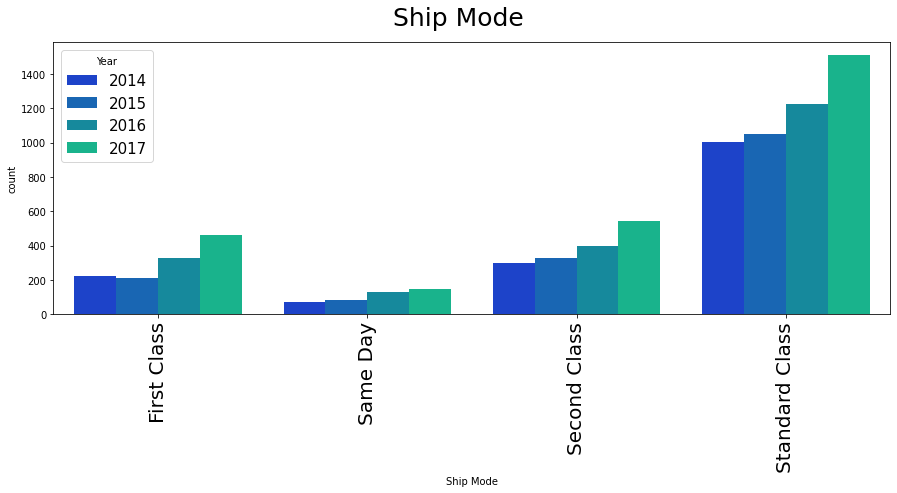

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


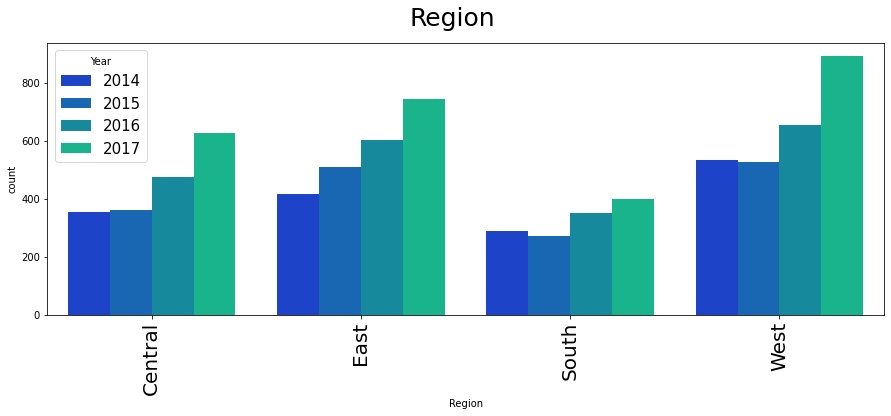

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


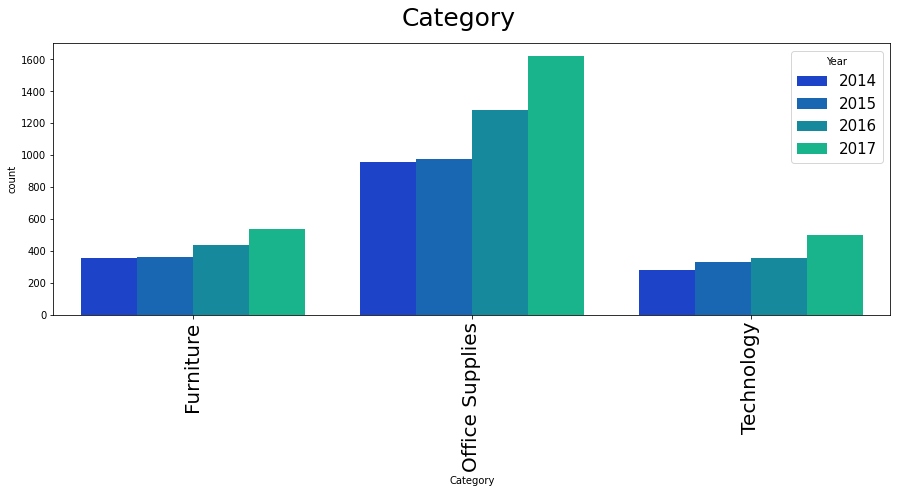

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


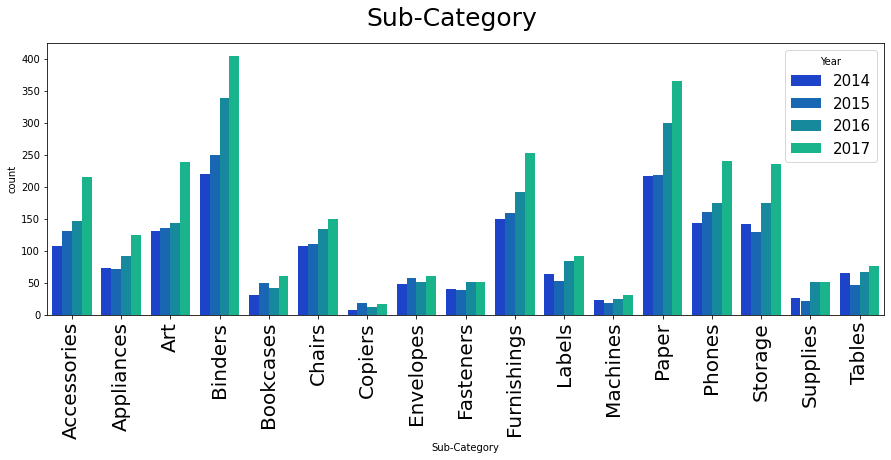

In [16]:
catcol = ['Ship Mode', 'Region', 'Category', 'Sub-Category']

for i in catcol:
    plt.figure(figsize=(15,5))
    sns.countplot(x=data_no_missing[i], palette='winter', hue=data_no_missing['Ord_year'])
    plt.suptitle(i, fontsize=25)
    plt.xticks(fontsize=20)
    #plt.xlabel(i, fontsize=25)
    print('+' * 120)
    plt.xticks(rotation=90)
    plt.legend(title='Year', fontsize=15)
   
    plt.show()

In [17]:
'''# Products with Most Loss after Sales by Region from 2014-2017
dd = data_no_missing.nsmallest(20, 'Profit')
dc = dd.groupby(['Product Name', 'Region'])['Profit'].sum().sort_values()
dc.unstack().plot(kind='barh', figsize=(15,20))
plt.xlim(reversed(plt.xlim()))
plt.xlabel('Loss amount',weight='bold', size='large')
plt.ylabel('Product Name', weight='bold', size='large')
plt.title('Products with Most Loss after Sales by Region from 2014-2017', weight='bold', size='xx-large')

#plt.legend(fontsize=20) # using a size in points
plt.legend(fontsize="xx-large")



#plt.figure(figsize=(15,15))
#plt.figure(figsize=(15,15))
#sns.barplot(x='Profit', y='Product Name', hue='Region', ci=None, data=dd)
#plt.xlim(reversed(plt.xlim()))'''


'# Products with Most Loss after Sales by Region from 2014-2017\ndd = data_no_missing.nsmallest(20, \'Profit\')\ndc = dd.groupby([\'Product Name\', \'Region\'])[\'Profit\'].sum().sort_values()\ndc.unstack().plot(kind=\'barh\', figsize=(15,20))\nplt.xlim(reversed(plt.xlim()))\nplt.xlabel(\'Loss amount\',weight=\'bold\', size=\'large\')\nplt.ylabel(\'Product Name\', weight=\'bold\', size=\'large\')\nplt.title(\'Products with Most Loss after Sales by Region from 2014-2017\', weight=\'bold\', size=\'xx-large\')\n\n#plt.legend(fontsize=20) # using a size in points\nplt.legend(fontsize="xx-large")\n\n\n\n#plt.figure(figsize=(15,15))\n#plt.figure(figsize=(15,15))\n#sns.barplot(x=\'Profit\', y=\'Product Name\', hue=\'Region\', ci=None, data=dd)\n#plt.xlim(reversed(plt.xlim()))'

In [18]:
'''# 'Products with Most Profit after Sales by Region from 2014-2017

dd = data_no_missing.nlargest(50, 'Profit')
dc = dd.groupby(['Product Name', 'Region'])['Profit'].sum().sort_values()
dc.unstack().plot(kind='barh', figsize=(15,20))
#plt.xlim(reversed(plt.xlim()))
plt.xlabel('Profit amount',weight='bold', size='large')
plt.ylabel('Product Name', weight='bold', size='large')
plt.title('Products with Most Profit after Sales by Region from 2014-2017', weight='bold', size='xx-large')

#plt.legend(fontsize=20) # using a size in points
plt.legend(fontsize="xx-large")'''

'# \'Products with Most Profit after Sales by Region from 2014-2017\n\ndd = data_no_missing.nlargest(50, \'Profit\')\ndc = dd.groupby([\'Product Name\', \'Region\'])[\'Profit\'].sum().sort_values()\ndc.unstack().plot(kind=\'barh\', figsize=(15,20))\n#plt.xlim(reversed(plt.xlim()))\nplt.xlabel(\'Profit amount\',weight=\'bold\', size=\'large\')\nplt.ylabel(\'Product Name\', weight=\'bold\', size=\'large\')\nplt.title(\'Products with Most Profit after Sales by Region from 2014-2017\', weight=\'bold\', size=\'xx-large\')\n\n#plt.legend(fontsize=20) # using a size in points\nplt.legend(fontsize="xx-large")'

In [19]:
'''# 'Products with Most Profit after Sales by Region from 2014-2017

dp = data_no_missing.groupby(['Product Name', 'Region'])['Profit'].sum().sort_values()

#data_no_missing['Profit'].sort_values(ascending=False)
#data_no_missing.nlargest(50, 'Profit')
#dc = dd.groupby(['Product Name', 'Region'])['Profit'].sum().sort_values()
#dc.unstack().plot(kind='barh', figsize=(15,20))
#plt.xlim(reversed(plt.xlim()))
#plt.xlabel('Profit amount',weight='bold', size='large')
#plt.ylabel('Product Name', weight='bold', size='large')
#plt.title('Products with Most Profit after Sales by Region from 2014-2017', weight='bold', size='xx-large')

#plt.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="xx-large")'''

'# \'Products with Most Profit after Sales by Region from 2014-2017\n\ndp = data_no_missing.groupby([\'Product Name\', \'Region\'])[\'Profit\'].sum().sort_values()\n\n#data_no_missing[\'Profit\'].sort_values(ascending=False)\n#data_no_missing.nlargest(50, \'Profit\')\n#dc = dd.groupby([\'Product Name\', \'Region\'])[\'Profit\'].sum().sort_values()\n#dc.unstack().plot(kind=\'barh\', figsize=(15,20))\n#plt.xlim(reversed(plt.xlim()))\n#plt.xlabel(\'Profit amount\',weight=\'bold\', size=\'large\')\n#plt.ylabel(\'Product Name\', weight=\'bold\', size=\'large\')\n#plt.title(\'Products with Most Profit after Sales by Region from 2014-2017\', weight=\'bold\', size=\'xx-large\')\n\n#plt.legend(fontsize=20) # using a size in points\n#plt.legend(fontsize="xx-large")'

In [20]:
#pivot tabel for products with highest loss and highest gain  for each region

dpp = data_no_missing.pivot_table(index='Product Name', columns='Region', values='Profit', fill_value=0, aggfunc=np.sum)
dpp['sum'] = dpp.sum(axis=1)
dpp = dpp.sort_values(by='sum')

#20 products with highest gain and loss
profit_products = dpp.nlargest(10, 'sum')
loss_products = dpp.nsmallest(10, 'sum')

In [21]:
# pivot table for products ranked according to their profit or loss for each region
dpp 

Region,Central,East,South,West,sum
Product Name,,,,,
Cubify CubeX 3D Printer Double Head Print,0.0000,-9239.9692,0.0000,359.9988,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,-1189.9930,0.0000,0.0000,-3399.9800,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,0.0000,0.0000,-3839.9904,0.0000,-3839.9904
Bush Advantage Collection Racetrack Conference Table,-152.7156,-466.6310,-653.2834,-814.4832,-2087.1132
Cisco TelePresence System EX90 Videoconferencing Unit,0.0000,0.0000,-1811.0784,0.0000,-1811.0784
...,...,...,...,...,...
Plantronics Savi W720 Multi-Device Wireless Headset System,0.0000,1721.5560,303.8040,1670.9220,3696.2820
"3D Systems Cube Printer, 2nd Generation, Magenta",0.0000,3717.9714,0.0000,0.0000,3717.9714
Ativa V4110MDD Micro-Cut Shredder,0.0000,3772.9461,0.0000,0.0000,3772.9461


In [22]:
#15 most profitable products from 2014 to 2017
profit_products

Region,Central,East,South,West,sum
Product Name,,,,,
Canon imageCLASS 2200 Advanced Copier,8399.9760,10079.9712,0.0000,0.0000,18479.9472
Hewlett Packard LaserJet 3310 Copier,335.9944,2783.9536,1439.9760,2183.9636,6743.8876
Ativa V4110MDD Micro-Cut Shredder,0.0000,3772.9461,0.0000,0.0000,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",0.0000,3717.9714,0.0000,0.0000,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,0.0000,1721.5560,303.8040,1670.9220,3696.2820
Ibico EPK-21 Electric Binding System,1700.9910,0.0000,0.0000,1644.2913,3345.2823
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,-1525.1880,1270.9900,3177.4750,381.2970,3304.5740
Canon Imageclass D680 Copier / Fax,874.9875,244.9965,629.9910,1049.9850,2799.9600
Hewlett Packard 610 Color Digital Copier / Printer,1074.9785,1149.9770,0.0000,374.9925,2599.9480


In [23]:
#15 products with highest loss from 2014 to 2017
loss_products

Region,Central,East,South,West,sum
Product Name,,,,,
Cubify CubeX 3D Printer Double Head Print,0.0000,-9239.9692,0.0000,359.9988,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,-1189.9930,0.0000,0.0000,-3399.9800,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,0.0000,0.0000,-3839.9904,0.0000,-3839.9904
Bush Advantage Collection Racetrack Conference Table,-152.7156,-466.6310,-653.2834,-814.4832,-2087.1132
Cisco TelePresence System EX90 Videoconferencing Unit,0.0000,0.0000,-1811.0784,0.0000,-1811.0784
"Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish",-317.1528,-1506.4758,0.0000,140.9568,-1682.6718
GBC Ibimaster 500 Manual ProClick Binding System,0.0000,-608.7840,-1065.3720,0.0000,-1674.1560
Martin Yale Chadless Opener Electric Letter Opener,83.2810,-1199.2464,116.5934,-299.8116,-1299.1836
GBC ProClick 150 Presentation Binding System,-1147.0074,0.0000,-145.3508,0.0000,-1292.3582


In [24]:
profit_products.drop('sum', axis=1, inplace=True)

In [25]:
loss_products.drop('sum', axis=1, inplace=True)

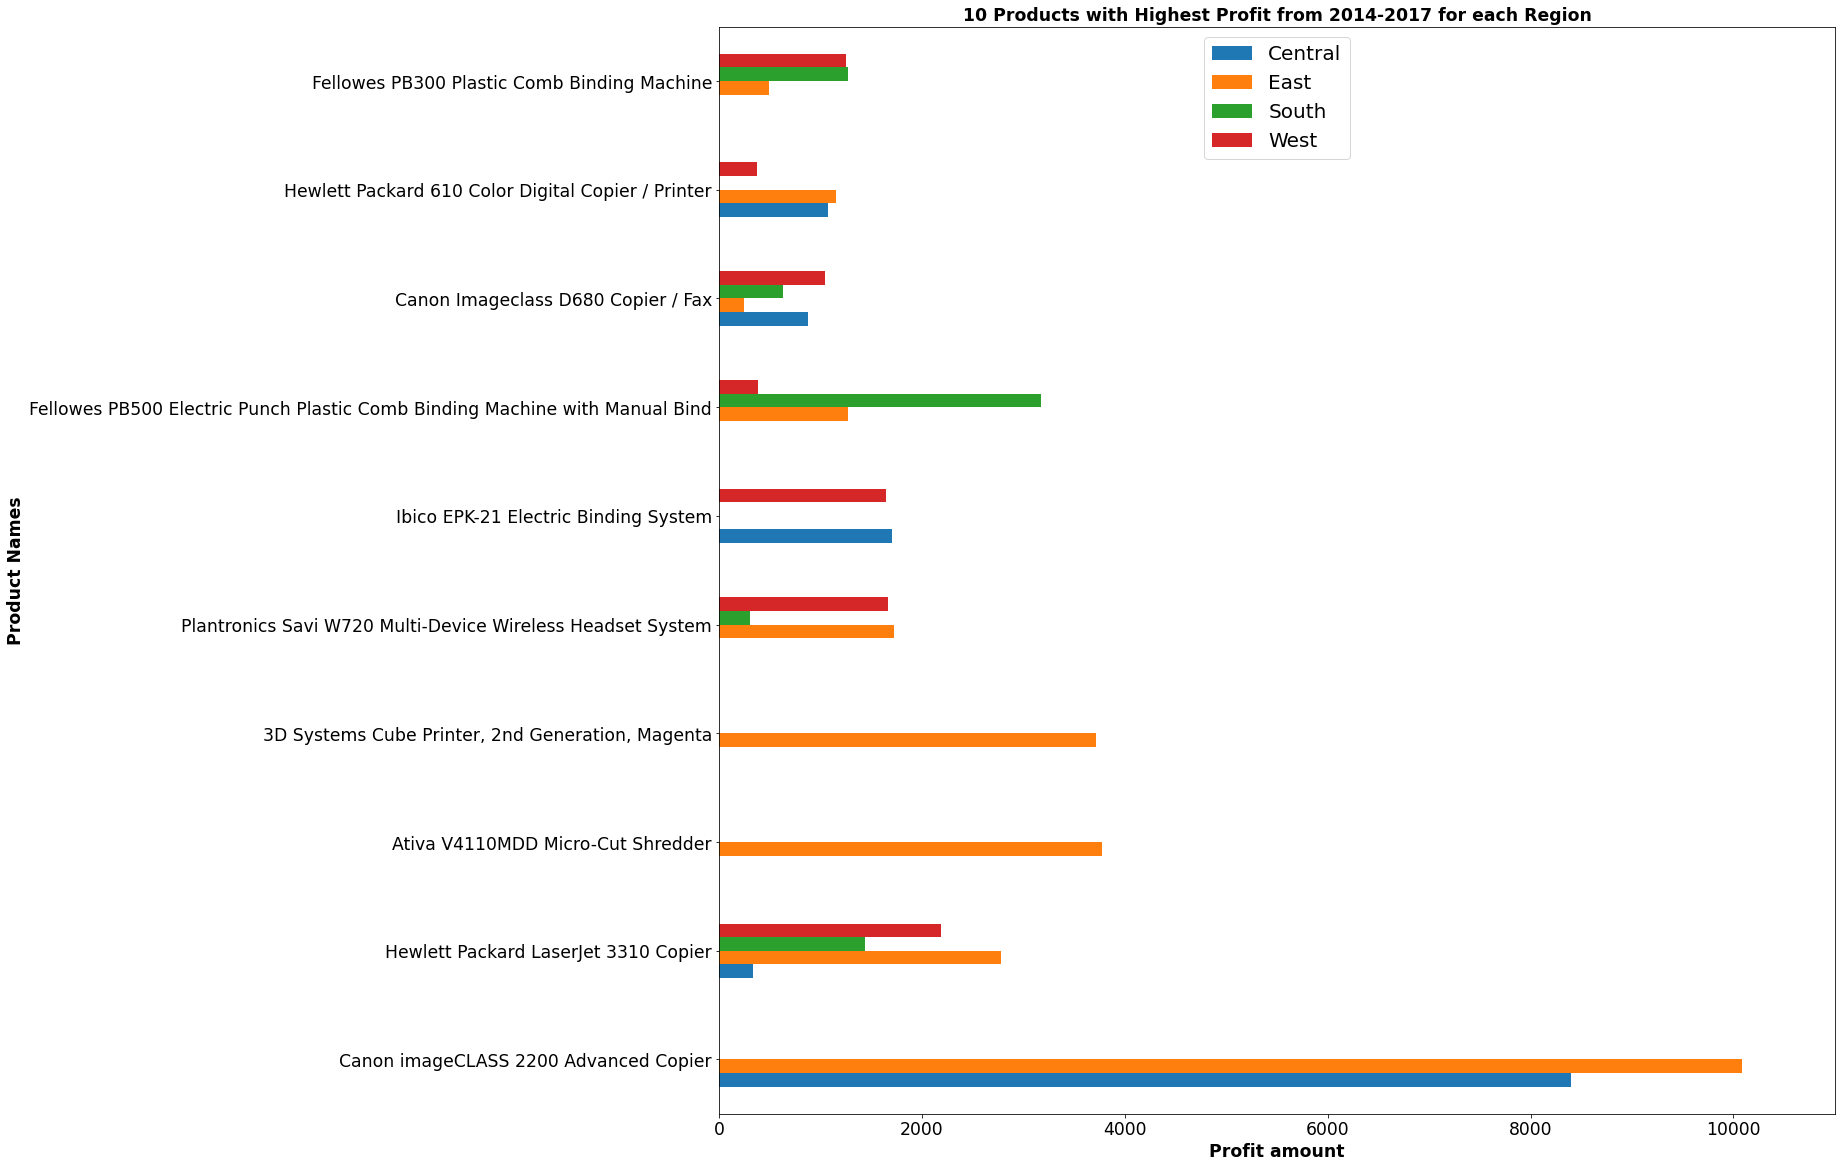

In [26]:
#Products with Most Profit after Sales by Region from 2014-2017

profit_products.plot(kind='barh', figsize=(20,20))
#plt.xlim(reversed(plt.xlim()))
plt.xlabel('Profit amount',weight='bold', size='xx-large')
plt.ylabel('Product Names', weight='bold', size='xx-large')
plt.title('10 Products with Highest Profit from 2014-2017 for each Region', weight='bold', size='xx-large')
plt.xlim(0,11000)
plt.xticks(size='xx-large')
plt.yticks( size='xx-large')



#plt.legend(fontsize=20) # using a size in points
plt.legend(fontsize=20, loc='upper center')
plt.show()

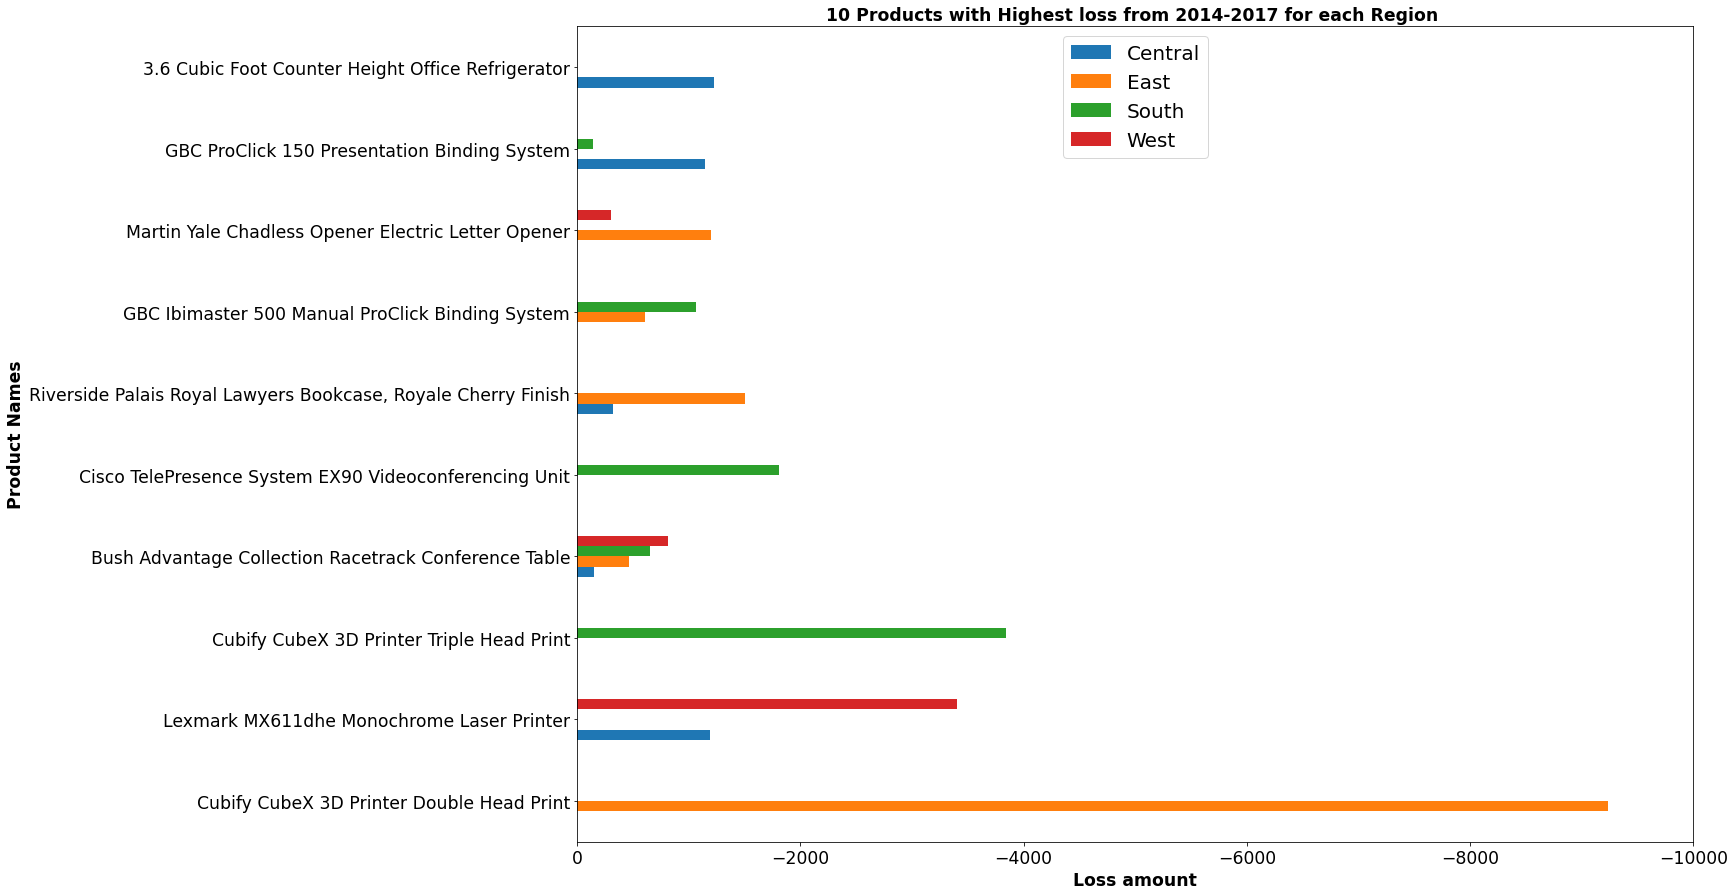

In [27]:
#Products with Most loss after Sales by Region from 2014-2017

loss_products.plot(kind='barh', figsize=(20,15))
plt.xlim(reversed(plt.xlim()))
plt.xlabel('Loss amount',weight='bold', size='xx-large')
plt.ylabel('Product Names', weight='bold', size='xx-large')
plt.title('10 Products with Highest loss from 2014-2017 for each Region ', weight='bold', size='xx-large')
plt.xlim(0, -10000)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')


#plt.legend(fontsize="xx-large")

plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()

In [28]:
dpsub = data_no_missing.pivot_table(index='Sub-Category', columns='Region', values='Profit', fill_value=0, aggfunc=np.sum)
#dpsub['total profit'] = dpsub.sum(axis=1)
#dpsub = dpsub.sort_values(by='total profit')

In [29]:
dpsub=dpsub.round(1)
dpsub

Region,Central,East,South,West
Sub-Category,,,,
Accessories,5623.1,9328.0,6258.5,12968.7
Appliances,-2272.2,6977.0,3093.1,7021.9
Art,1019.5,1619.8,734.5,1870.0
Binders,-70.8,6527.8,2249.3,12069.0
Bookcases,-1530.9,-1215.2,1154.8,-1948.2
Chairs,6059.2,7353.4,6017.1,3526.6
Copiers,13008.9,16491.9,3346.9,10900.3
Envelopes,1323.0,1672.9,1315.4,1808.7
Fasteners,226.5,198.9,150.0,243.2


In [30]:
#highlight2 if v == mincol else default 


def max_value_in_column(column):    

    highlight = 'background-color: skyblue'
    
    default = ''
    highlight2 = 'background=color: pink'
    maxcol = column.max()
    mincol= column.min()

    # must return one string per cell in this column
    return [ highlight if v == maxcol else highlight2 if v == mincol else default for v in column]

dpsubmax=dpsub.style.apply(max_value_in_column, axis=1)


In [31]:
dpsubmax

Region,Central,East,South,West
Sub-Category,,,,
Accessories,5623.100000,9328.000000,6258.500000,12968.700000
Appliances,-2272.200000,6977.000000,3093.100000,7021.900000
Art,1019.500000,1619.800000,734.500000,1870.000000
Binders,-70.800000,6527.800000,2249.300000,12069.000000
Bookcases,-1530.900000,-1215.200000,1154.800000,-1948.200000
Chairs,6059.200000,7353.400000,6017.100000,3526.600000
Copiers,13008.900000,16491.900000,3346.900000,10900.300000
Envelopes,1323.000000,1672.900000,1315.400000,1808.700000
Fasteners,226.500000,198.900000,150.000000,243.200000


In [32]:

def minimum_value_in_column(column):    

    highlight = 'background-color: pink'
    
    default = ''

    minimum_in_column = column.min()
    maxcol = column.max()

    # must return one string per cell in this column
    return [highlight if v == minimum_in_column else default for v in column]


dpsubmin= dpsub.style.apply(minimum_value_in_column, axis=1)


In [33]:
dpsubmin

Region,Central,East,South,West
Sub-Category,,,,
Accessories,5623.100000,9328.000000,6258.500000,12968.700000
Appliances,-2272.200000,6977.000000,3093.100000,7021.900000
Art,1019.500000,1619.800000,734.500000,1870.000000
Binders,-70.800000,6527.800000,2249.300000,12069.000000
Bookcases,-1530.900000,-1215.200000,1154.800000,-1948.200000
Chairs,6059.200000,7353.400000,6017.100000,3526.600000
Copiers,13008.900000,16491.900000,3346.900000,10900.300000
Envelopes,1323.000000,1672.900000,1315.400000,1808.700000
Fasteners,226.500000,198.900000,150.000000,243.200000


In [34]:
# function definition
def negative_value_in_column(s):
    color = 'tomato' if s < 0 else ''
    return 'background-color: % s' % color
  
# highlighting the cells
#display(dpsub.style.applymap(negative_value_in_column))


dpsubneg= dpsub.style.applymap(negative_value_in_column)

In [35]:
dpsubneg

Region,Central,East,South,West
Sub-Category,,,,
Accessories,5623.100000,9328.000000,6258.500000,12968.700000
Appliances,-2272.200000,6977.000000,3093.100000,7021.900000
Art,1019.500000,1619.800000,734.500000,1870.000000
Binders,-70.800000,6527.800000,2249.300000,12069.000000
Bookcases,-1530.900000,-1215.200000,1154.800000,-1948.200000
Chairs,6059.200000,7353.400000,6017.100000,3526.600000
Copiers,13008.900000,16491.900000,3346.900000,10900.300000
Envelopes,1323.000000,1672.900000,1315.400000,1808.700000
Fasteners,226.500000,198.900000,150.000000,243.200000


In [36]:
#summary of categorical column type
data_no_missing.describe(include = 'category')

,Ship Mode,Region,Category,Sub-Category,Ord_year,Ord_month,Ord_day_of_week
count,8000,8000,8000,8000,8000,8000,8000
unique,4,4,3,17,4,12,7
top,Standard Class,West,Office Supplies,Binders,2017,November,Monday
freq,4788,2605,4840,1214,2662,1178,1496


In [37]:
#summary of object column type
data_no_missing.describe(include = 'object')

,Order ID,Product ID,Product Name
count,8000,8000,8000
unique,3962,1831,1819
top,CA-2017-100111,TEC-AC-10002049,Staples
freq,14,15,43


In [38]:
data_no_missing.head(5)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,priceb4discount,Ord_year,Ord_month,Ord_day,Ord_day_of_week
1993,CA-2016-152156,2016-11-08,Second Class,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,261.96,2016,November,8,Tuesday
1994,CA-2016-152156,2016-11-08,Second Class,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,731.94,2016,November,8,Tuesday
1995,CA-2016-138688,2016-06-12,Second Class,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,14.62,2016,June,12,Sunday
1996,US-2015-108966,2015-10-11,Standard Class,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1741.05,2015,October,11,Sunday
1997,US-2015-108966,2015-10-11,Standard Class,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,27.96,2015,October,11,Sunday


In [39]:
'''dpyear = data_no_missing.pivot_table(index='Product Name', values='Profit', columns='Ord_year', fill_value=0, aggfunc=np.sum)
dpyear['sum'] = dpyear.sum(axis=1)
dpyear = dpyear.sort_values(by='sum')
dpyear


#20 products with highest gain and loss over the fours
prod_profyear = dpyear.nlargest(20, 'sum')
prod_lossyear = dpp.nsmallest(20, 'sum')'''

"dpyear = data_no_missing.pivot_table(index='Product Name', values='Profit', columns='Ord_year', fill_value=0, aggfunc=np.sum)\ndpyear['sum'] = dpyear.sum(axis=1)\ndpyear = dpyear.sort_values(by='sum')\ndpyear\n\n\n#20 products with highest gain and loss over the fours\nprod_profyear = dpyear.nlargest(20, 'sum')\nprod_lossyear = dpp.nsmallest(20, 'sum')"

In [40]:
#prod_profyear.drop('sum', axis=1, inplace=True)
#dpyear

In [41]:
#prod_lossyear.drop('sum', axis=1, inplace=True)
#prod_lossyear

In [42]:
#Products with Most Profit after Sales by Region from 2014-2017

'''sns.lineplot(x= prod_profyear.index, y=prod_profyear.sum, data=prod_profyear)
#plt.xlim(reversed(plt.xlim()))
plt.xlabel('Profit amount',weight='bold', size='x-large')
plt.ylabel('Product Name', weight='bold', size='x-large')
plt.title('Products with Most Profit after Sales by Region from 2014-2017', weight='bold', size='xx-large')
plt.xlim(0,11000)
plt.yticks(weight='bold', size='large')

plt.legend(fontsize=20) # using a size in points
plt.legend(fontsize="xx-large")'''

'sns.lineplot(x= prod_profyear.index, y=prod_profyear.sum, data=prod_profyear)\n#plt.xlim(reversed(plt.xlim()))\nplt.xlabel(\'Profit amount\',weight=\'bold\', size=\'x-large\')\nplt.ylabel(\'Product Name\', weight=\'bold\', size=\'x-large\')\nplt.title(\'Products with Most Profit after Sales by Region from 2014-2017\', weight=\'bold\', size=\'xx-large\')\nplt.xlim(0,11000)\nplt.yticks(weight=\'bold\', size=\'large\')\n\nplt.legend(fontsize=20) # using a size in points\nplt.legend(fontsize="xx-large")'

In [43]:
subcat = data_no_missing.groupby('Sub-Category')['Sales'].sum().sort_values()
subcat

Sub-Category
Fasteners        2508.5500
Labels          10540.8600
Envelopes       14332.5060
Art             21913.1080
Supplies        44201.8140
Paper           64097.9980
Furnishings     72994.7120
Appliances      87090.6030
Bookcases       87723.1144
Copiers        119148.4020
Accessories    133812.1700
Binders        146508.3560
Machines       159003.2800
Tables         162418.1700
Storage        179766.5260
Chairs         264689.1690
Phones         267838.3340
Name: Sales, dtype: float64

In [44]:
subcatP = data_no_missing.groupby('Sub-Category')['Profit'].sum().sort_values()
subcatP

Sub-Category
Tables        -13392.9439
Bookcases      -3539.4843
Machines       -3024.8580
Supplies       -1239.6738
Fasteners        818.5984
Labels          4685.5425
Art             5243.7949
Envelopes       6119.9244
Furnishings    10851.4206
Appliances     14819.7536
Storage        17622.5872
Binders        20775.3364
Chairs         22956.2429
Paper          27916.9717
Accessories    34178.3898
Phones         36534.3185
Copiers        43747.9417
Name: Profit, dtype: float64

In [45]:
salescat = data_no_missing.groupby('Category')['Sales'].sum().sort_values()
salescat

Category
Office Supplies    570960.3210
Furniture          587825.1654
Technology         679802.1860
Name: Sales, dtype: float64

In [46]:
profitcat = data_no_missing.groupby('Category')['Profit'].sum().sort_values()
profitcat

Category
Furniture           16875.2353
Office Supplies     96762.8353
Technology         111435.7920
Name: Profit, dtype: float64

In [47]:
#Profit for each year in each region
 
profityear = data_no_missing.groupby(['Ord_year','Region'])['Profit'].sum()
profityear.unstack()

Region,Central,East,South,West
Ord_year,,,,
2014,3942.9354,13599.3286,9204.4091,17060.7788
2015,9075.7669,14048.5681,10508.8103,17372.1026
2016,13513.6857,16716.6394,12475.1710,17136.8856
2017,7562.0999,28109.1144,6577.9780,28169.5888


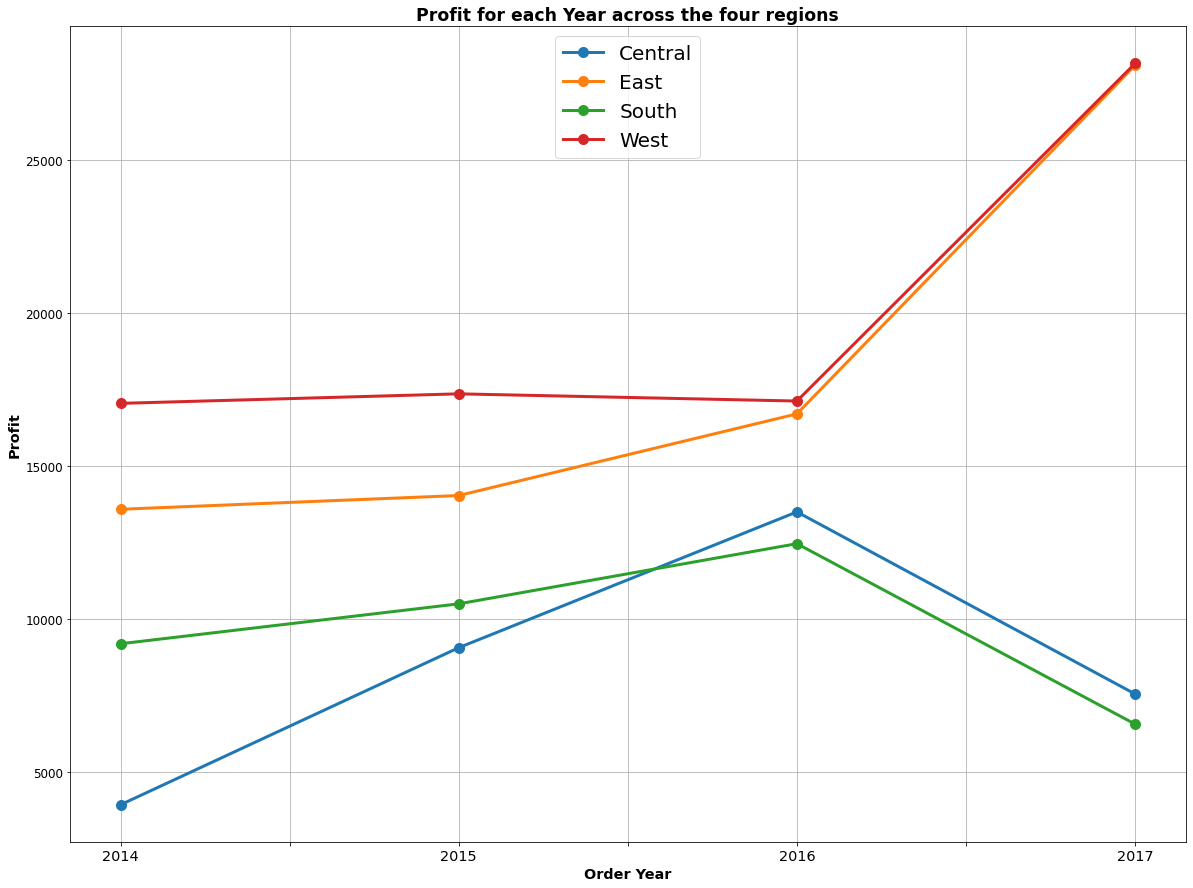

In [48]:
#plot for each year and region profits

profityear.unstack().plot(kind='line', figsize=(20,15), marker='o', markersize=10,linewidth=3)
plt.legend(loc='upper center')


plt.xlabel('Order Year',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Profit for each Year across the four regions', weight='bold', size='xx-large')
plt.xticks( size='x-large')
plt.yticks( size='large')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()

In [49]:
#quantity for each year and region profits

quanyear = data_no_missing.groupby(['Ord_year','Region'])['Quantity'].sum()
quanyear.unstack()

Region,Central,East,South,West
Ord_year,,,,
2014,1309,1606,1095,2089
2015,1423,1893,1075,1951
2016,1812,2171,1346,2440
2017,2351,2767,1501,3466


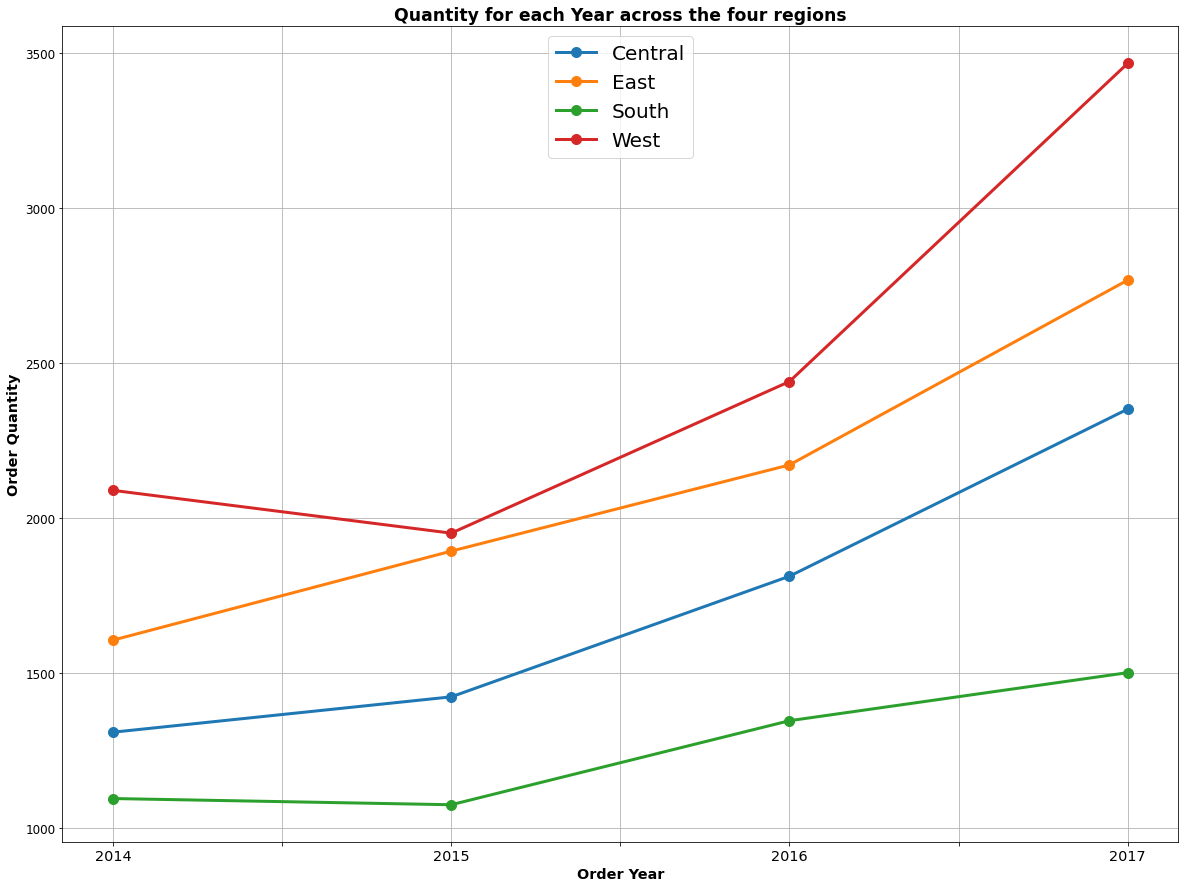

In [50]:
quanyear.unstack().plot(kind='line', figsize=(20,15), marker='o', markersize=10,linewidth=3)
plt.legend(loc='upper center')


plt.xlabel('Order Year',weight='bold', size='x-large')
plt.ylabel('Order Quantity', weight='bold', size='x-large')
plt.title('Quantity for each Year across the four regions', weight='bold', size='xx-large')
plt.xticks( size='x-large')
plt.yticks( size='large')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()

In [51]:
#Sales for each year in each region

salesyear = data_no_missing.groupby(['Ord_year','Region'])['Sales'].sum()
salesyear.unstack()

Region,Central,East,South,West
Ord_year,,,,
2014,86389.6096,106282.617,92488.3565,125540.8185
2015,79494.8646,121838.782,59678.4450,111494.4405
2016,108345.8900,145929.621,71525.4700,143184.3415
2017,120374.6192,177125.284,94242.5395,194651.9735


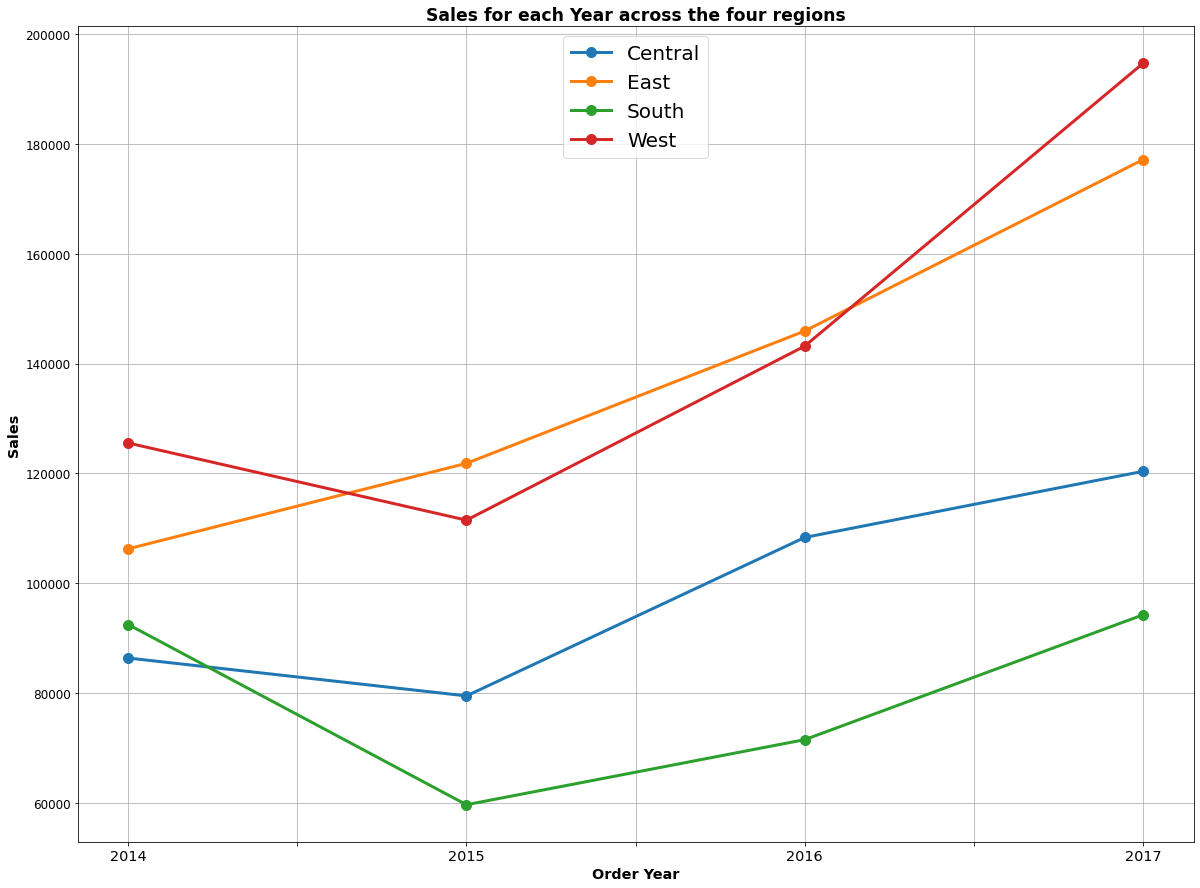

In [52]:
salesyear.unstack().plot(kind='line', figsize=(20,15), marker='o', markersize=10,linewidth=3)
plt.legend(loc='upper center')


plt.xlabel('Order Year',weight='bold', size='x-large')
plt.ylabel('Sales', weight='bold', size='x-large')
plt.title('Sales for each Year across the four regions', weight='bold', size='xx-large')
plt.xticks( size='x-large')
plt.yticks( size='large')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()

In [53]:
#sales for each category for the four regions

catsales = data_no_missing.groupby(['Category', 'Region'])['Sales'].sum()
catsales.unstack()

Region,Central,East,South,West
Category,,,,
Furniture,124986.4364,164769.542,90602.746,207466.441
Office Supplies,128076.0470,158905.390,101496.960,182481.924
Technology,141542.5000,227501.372,125835.105,184923.209


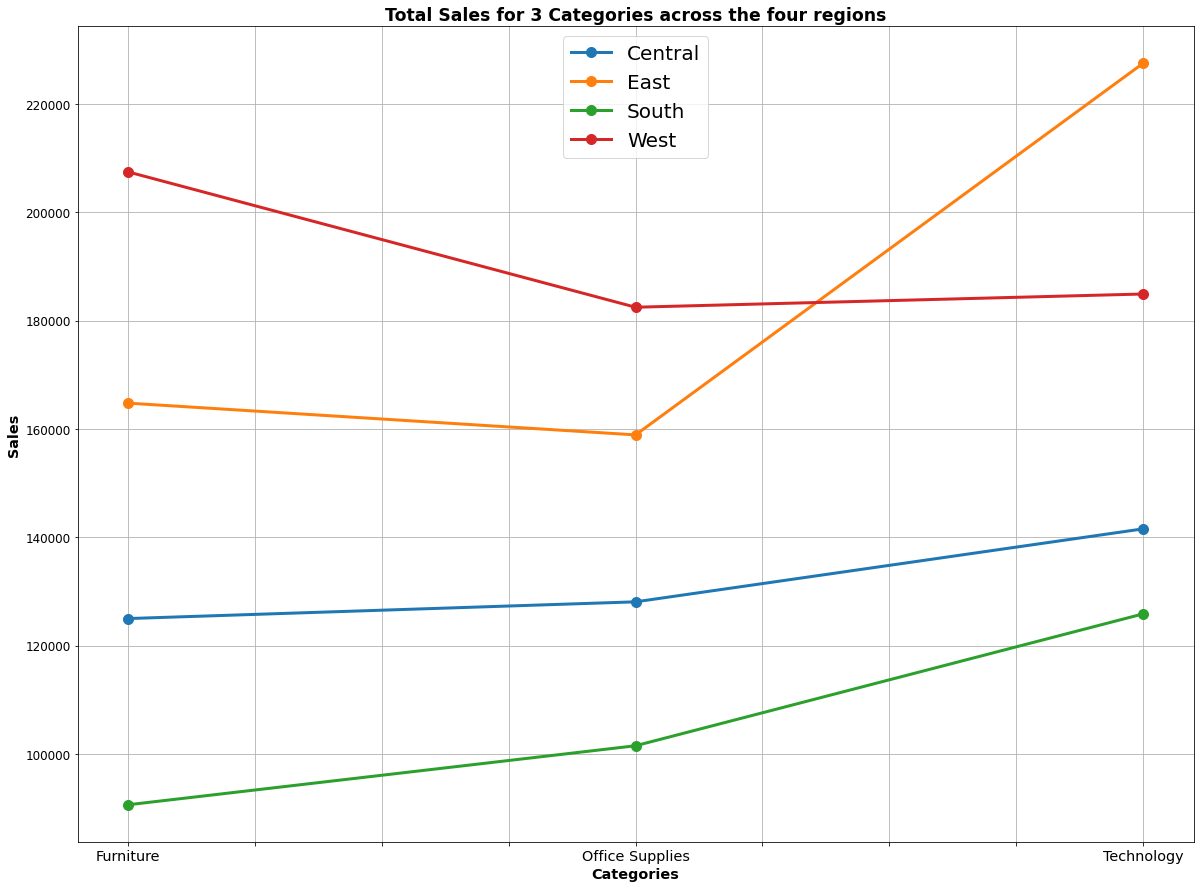

In [54]:
catsales.unstack().plot(kind='line', figsize=(20,15), marker='o', markersize=10,linewidth=3)
plt.legend(loc='upper center')


plt.xlabel('Categories',weight='bold', size='x-large')
plt.ylabel('Sales', weight='bold', size='x-large')
plt.title('Total Sales for 3 Categories across the four regions', weight='bold', size='xx-large')
plt.xticks( size='x-large')
plt.yticks( size='large')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()

In [55]:
#profit for each category for the four regions

catprof = data_no_missing.groupby(['Category', 'Region'])['Profit'].sum()
catprof.unstack()

Region,Central,East,South,West
Category,,,,
Furniture,-913.5425,1608.6478,8939.1156,7241.0144
Office Supplies,7240.2945,31013.3360,15364.0148,43145.1900
Technology,27767.7359,39851.6667,14463.2380,29353.1514


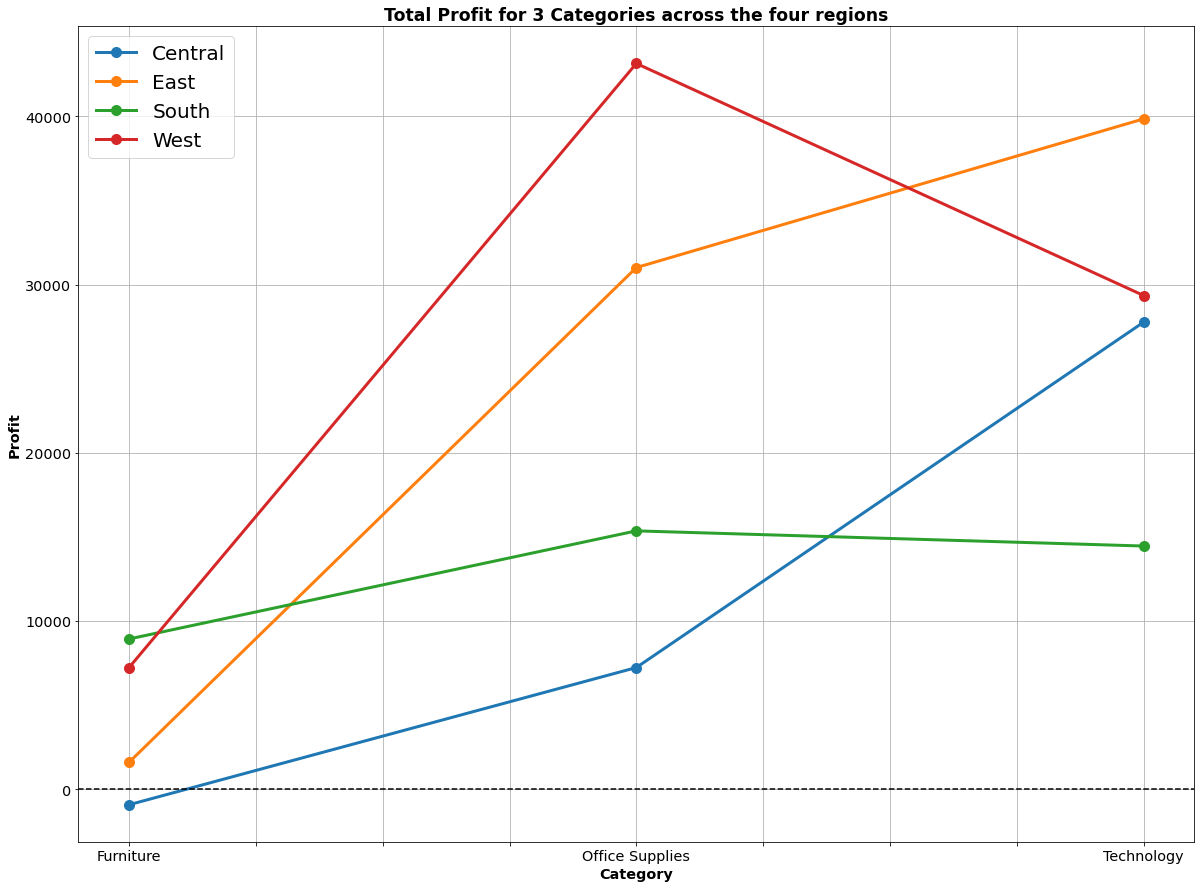

In [56]:
catprof.unstack().plot(kind='line', figsize=(20,15), marker='o', markersize=10,linewidth=3)
plt.legend(loc='upper center')


plt.xlabel('Category',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit for 3 Categories across the four regions', weight='bold', size='xx-large')
plt.xticks( size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc=2) # using a size in points
plt.show()



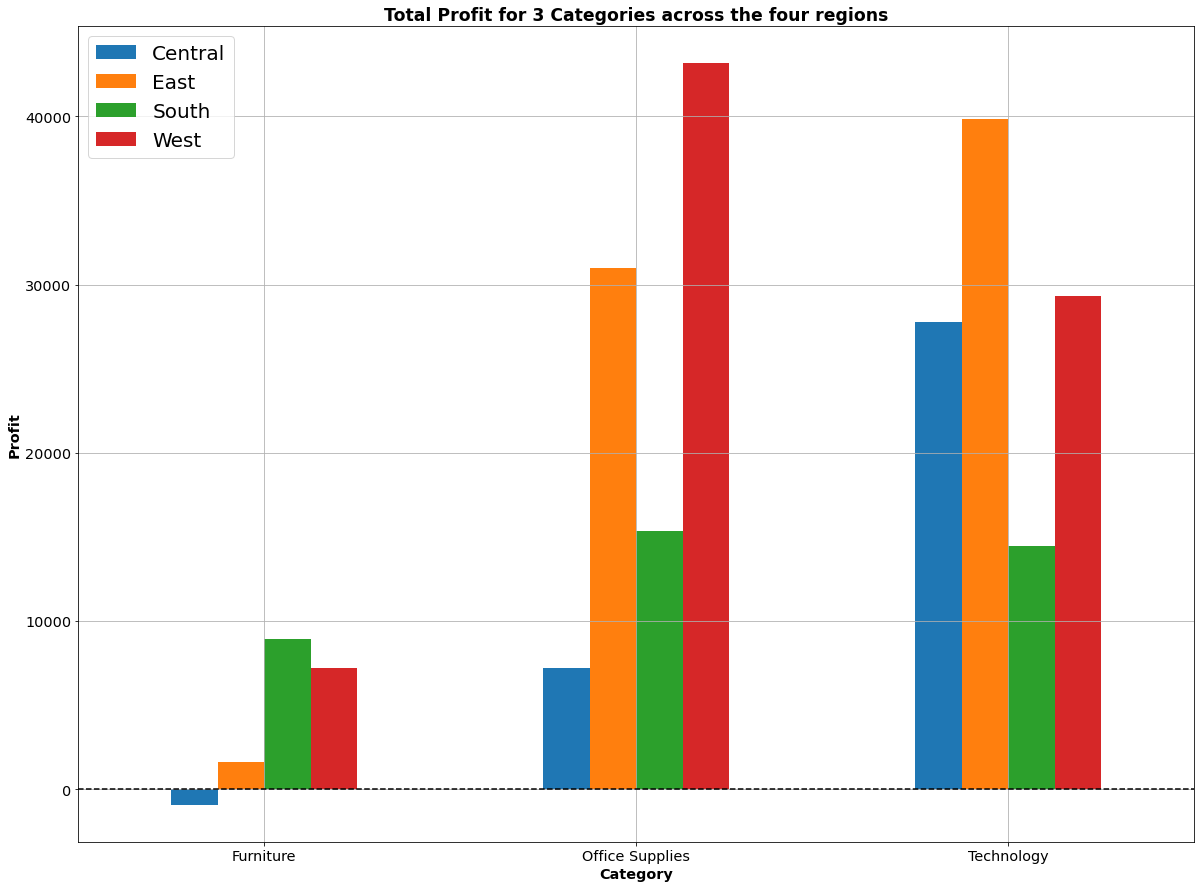

In [57]:
catprof.unstack().plot(kind='bar', figsize=(20,15))
plt.legend(loc='upper center')


plt.xlabel('Category',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit for 3 Categories across the four regions', weight='bold', size='xx-large')
plt.xticks(rotation=0, size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc=2) # using a size in points
plt.show()

In [58]:
catdisc = data_no_missing.groupby(['Category', 'Region'])['Discount'].sum()
catdisc.unstack()

Region,Central,East,South,West
Category,,,,
Furniture,102.96,74.8,30.2,80.05
Office Supplies,268.80,192.9,129.8,149.70
Technology,43.30,61.9,24.8,63.70


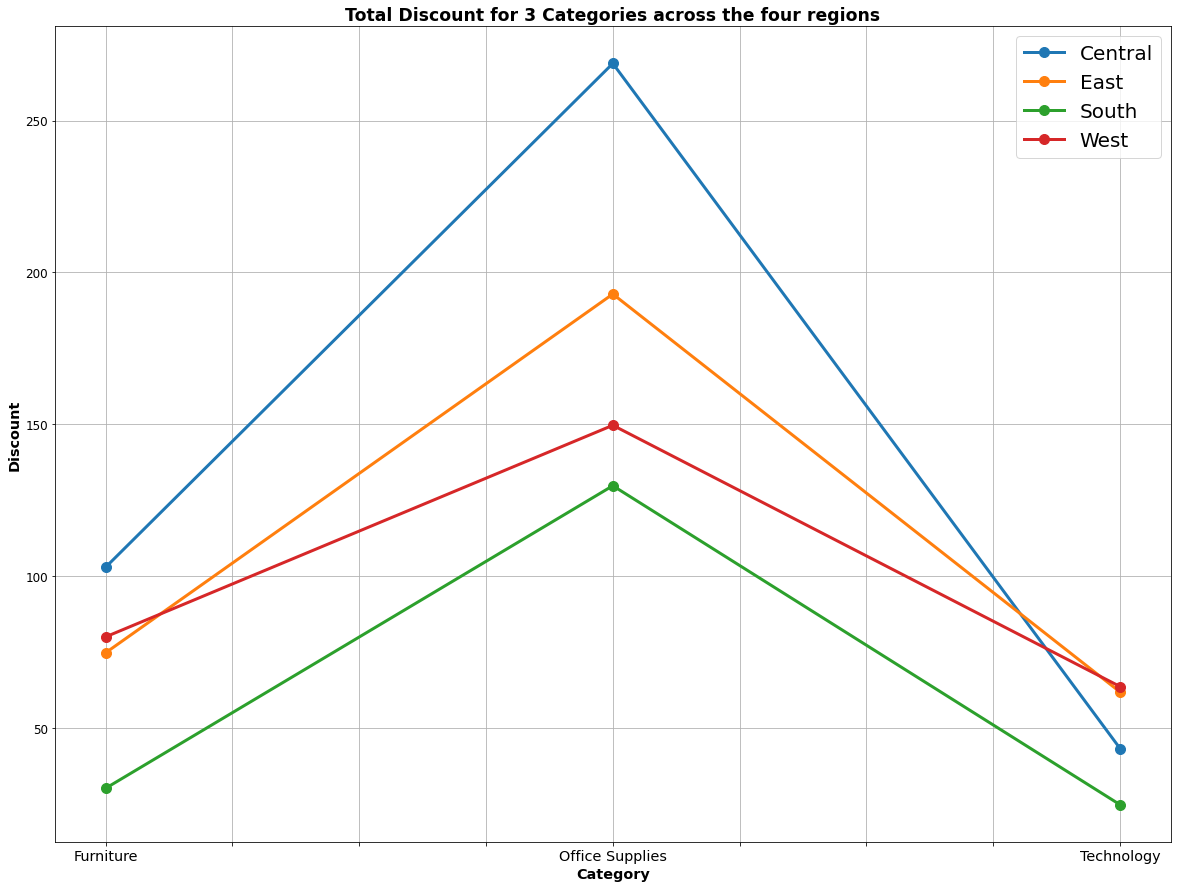

In [59]:
catdisc.unstack().plot(kind='line', figsize=(20,15), marker='o', markersize=10,linewidth=3)
plt.legend(loc='upper center')


plt.xlabel('Category',weight='bold', size='x-large')
plt.ylabel('Discount', weight='bold', size='x-large')
plt.title('Total Discount for 3 Categories across the four regions', weight='bold', size='xx-large')
plt.xticks( size='x-large')
plt.yticks( size='large')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper right') # using a size in points
plt.show()

In [60]:
sub_catprof = data_no_missing.groupby(['Sub-Category', 'Region'])['Profit'].sum().sort_values()
sub_catprof.unstack()

Region,Central,East,South,West
Sub-Category,,,,
Accessories,5623.1291,9328.0274,6258.5108,12968.7225
Appliances,-2272.1846,6976.9754,3093.0527,7021.9101
Art,1019.5330,1619.7823,734.5175,1869.9621
Binders,-70.7558,6527.7921,2249.2708,12069.0293
Bookcases,-1530.8899,-1215.1740,1154.7574,-1948.1778
Chairs,6059.1786,7353.4417,6017.0549,3526.5677
Copiers,13008.8868,16491.8531,3346.9119,10900.2899
Envelopes,1322.9819,1672.9061,1315.3816,1808.6548
Fasteners,226.4717,198.9074,149.9741,243.2452


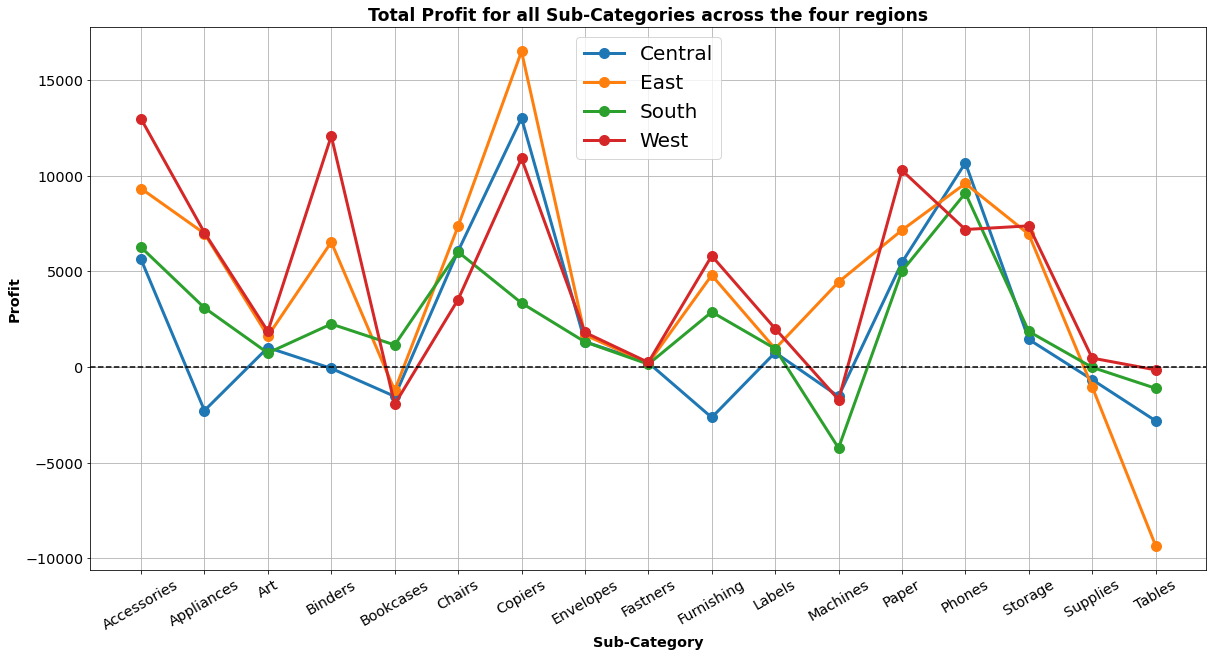

In [61]:
sub_catprof.unstack().plot(kind='line', figsize=(20,10), linewidth=3, marker='o', markersize=10)
plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), rotation=30, size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')




plt.xlabel('Sub-Category',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit for all Sub-Categories across the four regions', weight='bold', size='xx-large')



#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()


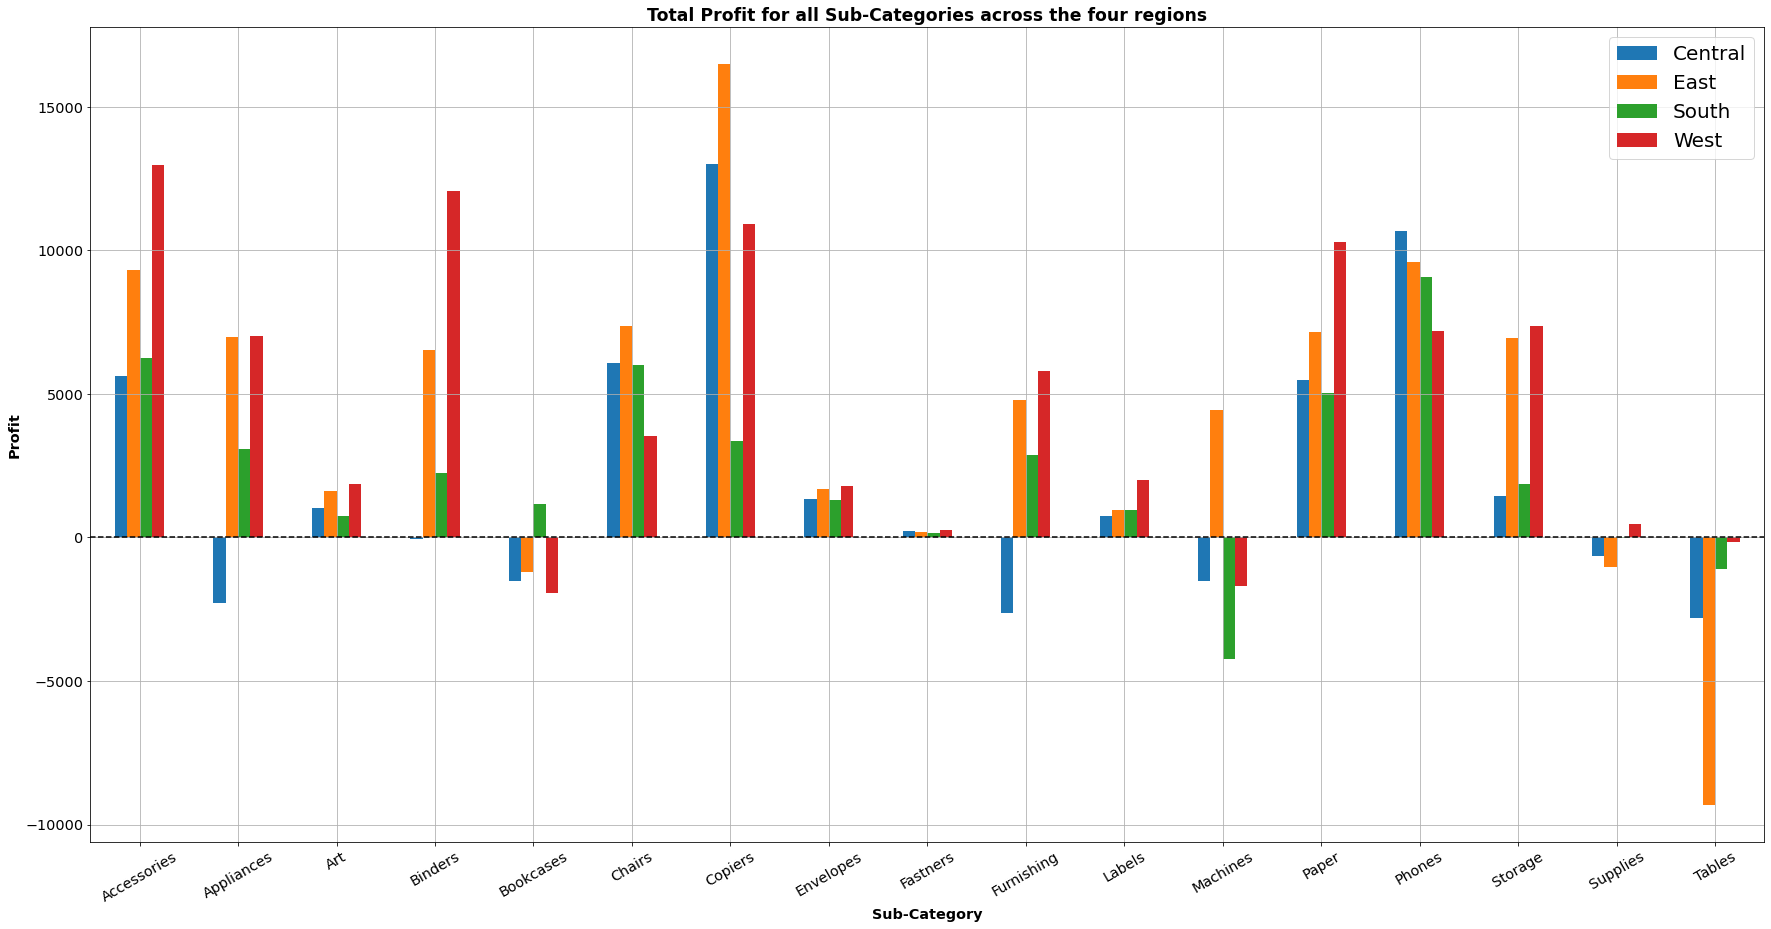

In [62]:
# bar plot for each subcategories profit in each region

sub_catprof.unstack().plot(kind='bar', figsize=(30,15), linewidth=3)
plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), rotation=30, size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')




plt.xlabel('Sub-Category',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit for all Sub-Categories across the four regions', weight='bold', size='xx-large')



#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper right') # using a size in points
plt.show()

In [63]:
sub_catquan = data_no_missing.groupby(['Sub-Category', 'Region'])['Quantity'].sum().sort_values()
sub_catquan.unstack()

Region,Central,East,South,West
Sub-Category,,,,
Accessories,557,548,399,795
Appliances,358,357,222,396
Art,564,678,430,727
Binders,1140,1279,817,1497
Bookcases,140,210,86,266
Chairs,477,532,278,621
Copiers,36,57,24,71
Envelopes,155,240,170,209
Fasteners,198,243,107,208


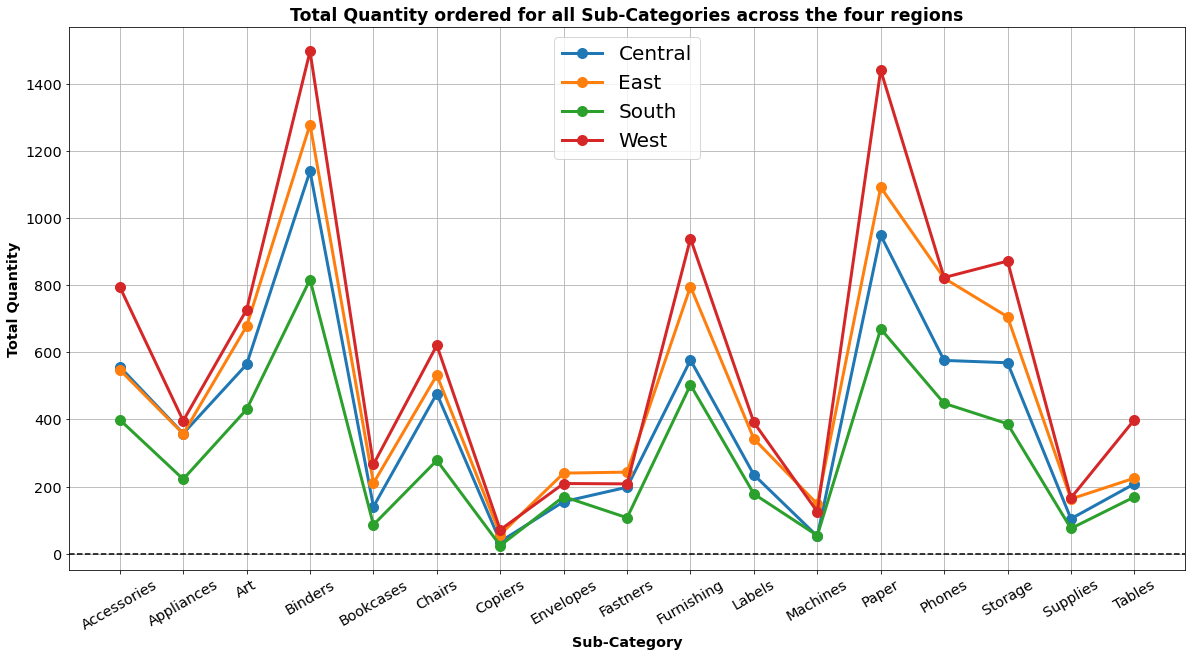

In [64]:
sub_catquan.unstack().plot(kind='line', figsize=(20,10), linewidth=3, marker='o', markersize=10)
plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), rotation=30, size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')




plt.xlabel('Sub-Category',weight='bold', size='x-large')
plt.ylabel('Total Quantity', weight='bold', size='x-large')
plt.title('Total Quantity ordered for all Sub-Categories across the four regions', weight='bold', size='xx-large')



#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') #using a size in points
plt.show()

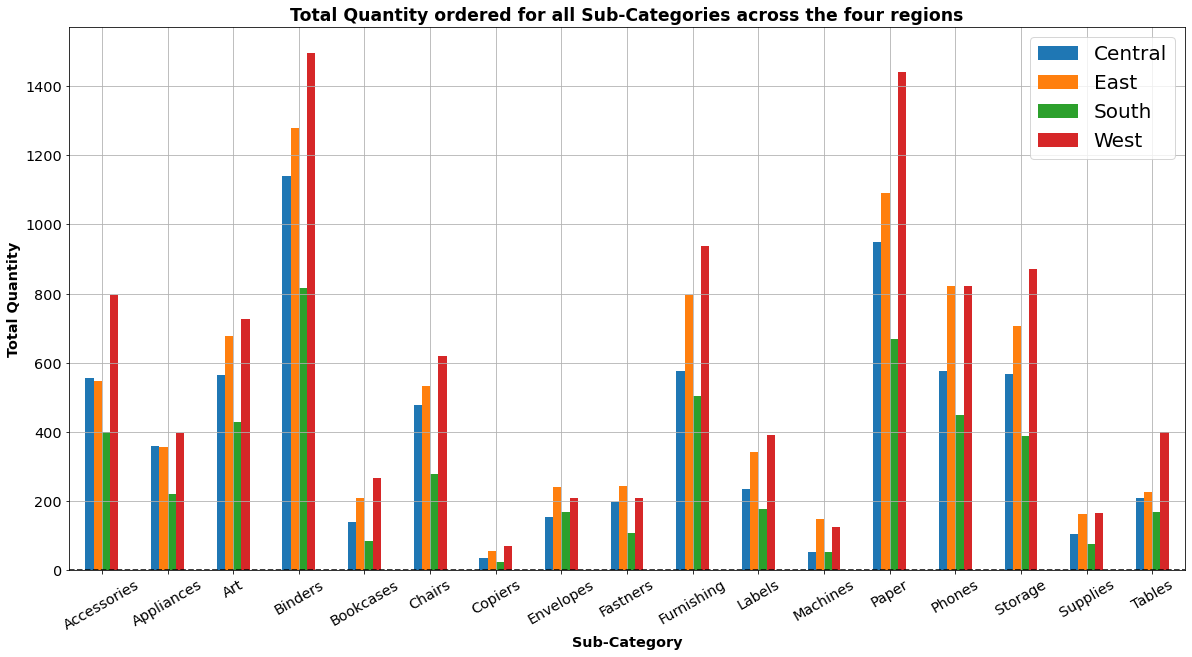

In [65]:
sub_catquan.unstack().plot(kind='bar', figsize=(20,10))
plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), rotation=30, size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')




plt.xlabel('Sub-Category',weight='bold', size='x-large')
plt.ylabel('Total Quantity', weight='bold', size='x-large')
plt.title('Total Quantity ordered for all Sub-Categories across the four regions', weight='bold', size='xx-large')



#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper right') # using a size in points
plt.show()

In [66]:
sub_catdisc = data_no_missing.groupby(['Sub-Category', 'Region'])['Discount'].sum().sort_values()
sub_catdisc.unstack()

Region,Central,East,South,West
Sub-Category,,,,
Accessories,17.60,13.6,8.4,7.20
Appliances,39.60,7.4,6.6,3.80
Art,16.60,12.6,11.4,6.60
Binders,136.80,121.9,72.8,110.90
Bookcases,8.46,11.6,1.4,16.65
Chairs,21.00,20.6,6.8,35.40
Copiers,1.40,3.6,0.4,3.00
Envelopes,5.60,5.2,3.6,2.60
Fasteners,6.00,4.2,2.2,2.40


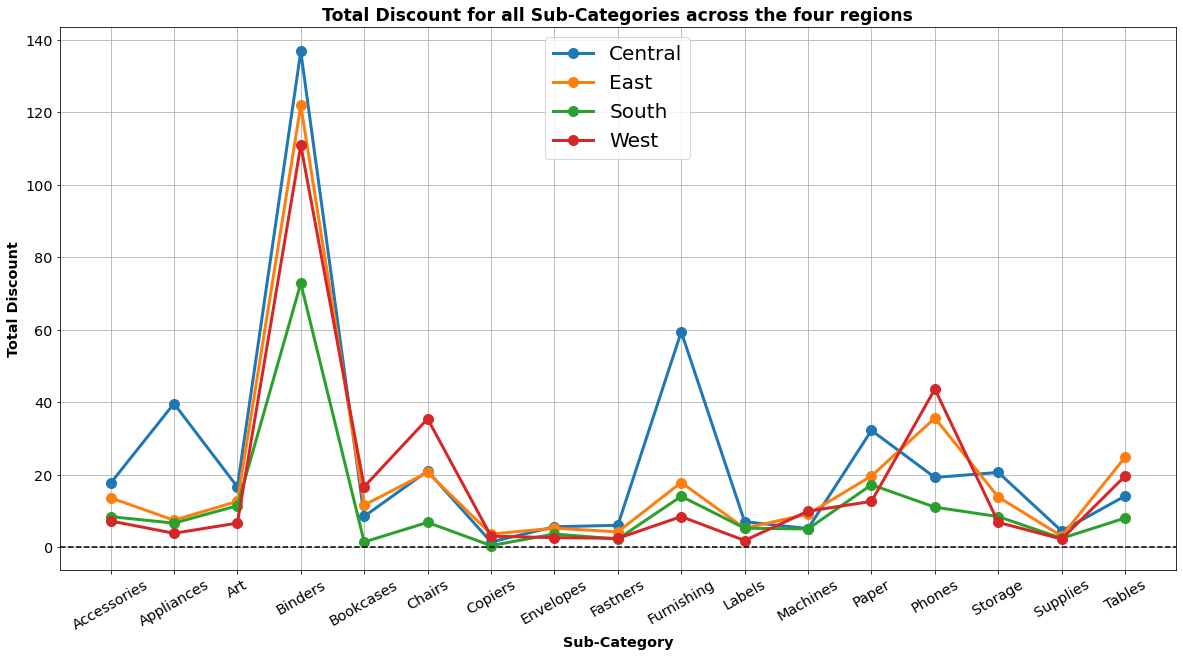

In [67]:
sub_catdisc.unstack().plot(kind='line', figsize=(20,10), linewidth=3, marker='o', markersize=10)
plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), rotation=30, size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')




plt.xlabel('Sub-Category',weight='bold', size='x-large')
plt.ylabel('Total Discount', weight='bold', size='x-large')
plt.title('Total Discount for all Sub-Categories across the four regions', weight='bold', size='xx-large')



#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()

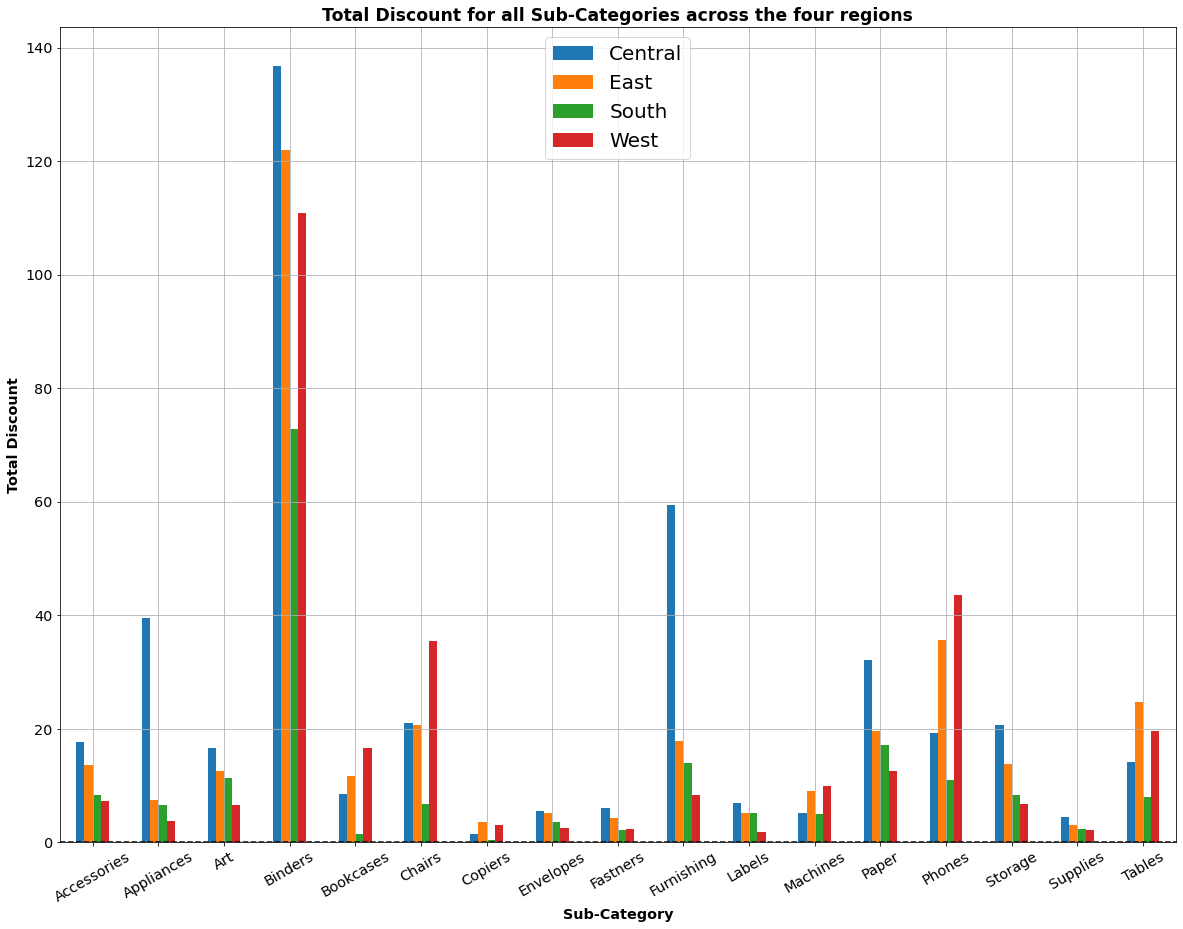

In [68]:
sub_catdisc.unstack().plot(kind='bar', figsize=(20,15))
plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), rotation=30, size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')




plt.xlabel('Sub-Category',weight='bold', size='x-large')
plt.ylabel('Total Discount', weight='bold', size='x-large')
plt.title('Total Discount for all Sub-Categories across the four regions', weight='bold', size='xx-large')



#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()

In [69]:
month_prof = data_no_missing.groupby(['Ord_month', 'Region'])['Profit'].sum().sort_values()
month_prof.unstack()

Region,Central,East,South,West
Ord_month,,,,
April,-316.0945,5082.0246,3962.6889,902.6793
August,2560.6056,2277.4999,3016.9724,9711.2490
December,2969.8151,11386.2344,4373.5739,11428.0847
February,-383.6544,2802.2696,2205.0866,2240.7189
January,4012.1450,-908.9989,2689.4842,3457.3030
July,2068.1129,3981.0502,2448.6940,7637.0866
June,593.8964,5555.3733,2643.4652,5829.6387
March,2088.2885,3121.1431,6455.5821,7449.6396
May,3970.5234,6133.1361,5591.7223,5227.4227


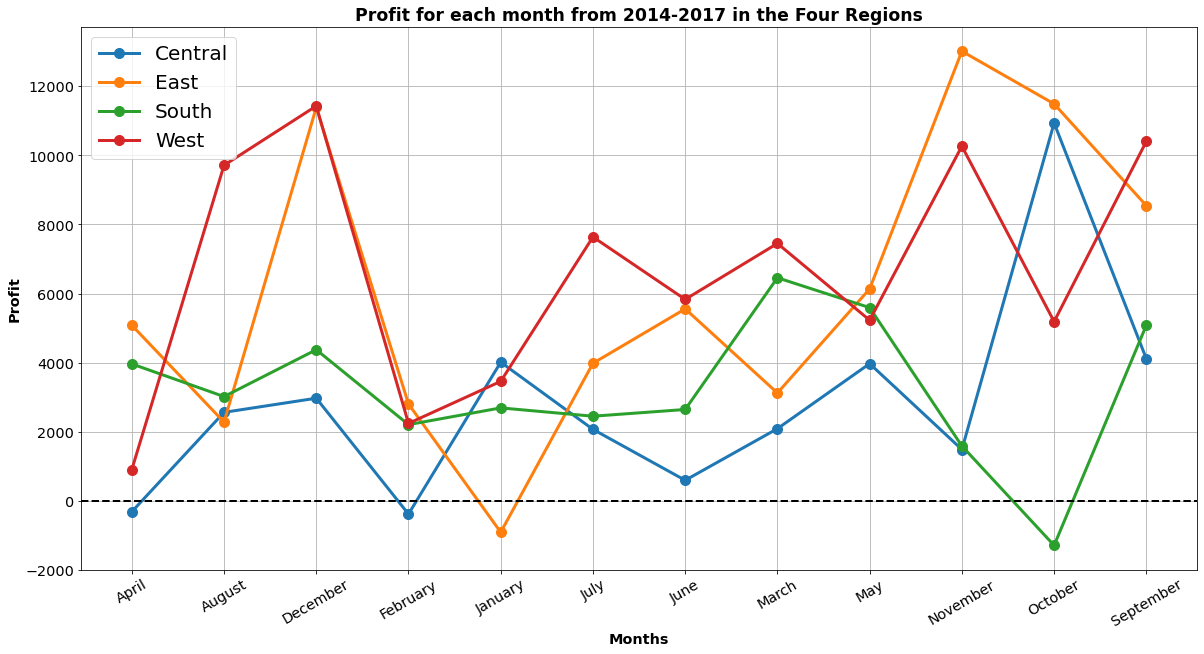

In [70]:
month_prof.unstack().plot(kind='line', figsize=(20,10), marker='o', markersize=10, linewidth=3)

plt.xticks(np.arange(12), ('April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September'), rotation=30, size='x-large', label='South Region')
plt.yticks(size='x-large')

plt.xlabel('Months',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')

plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)

plt.grid(True)
plt.title('Profit for each month from 2014-2017 in the Four Regions', weight='bold', size='xx-large')
plt.legend(fontsize=20, loc='upper left')
plt.show()


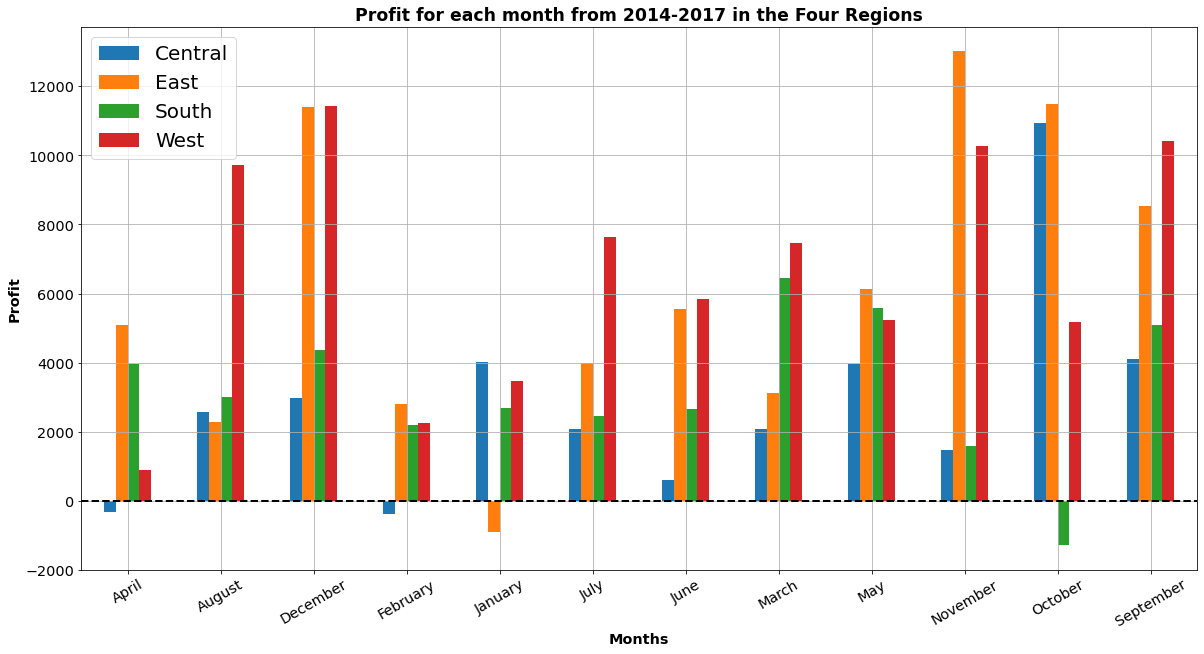

In [71]:
month_prof.unstack().plot(kind='bar', figsize=(20,10))

plt.xticks(np.arange(12), ('April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September'), rotation=30, size='x-large', label='South Region')
plt.yticks(size='x-large')

plt.xlabel('Months',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')

plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)

plt.grid(True)
plt.title('Profit for each month from 2014-2017 in the Four Regions', weight='bold', size='xx-large')
plt.legend(fontsize=20, loc='upper left')
plt.show()

In [72]:
catdiscQ = data_no_missing.groupby(['Category', 'Region'])['Quantity'].sum().sort_values()
catdiscQ.unstack()

Region,Central,East,South,West
Category,,,,
Furniture,1402,1763,1036,2225
Office Supplies,4272,5100,3056,5907
Technology,1221,1574,925,1814


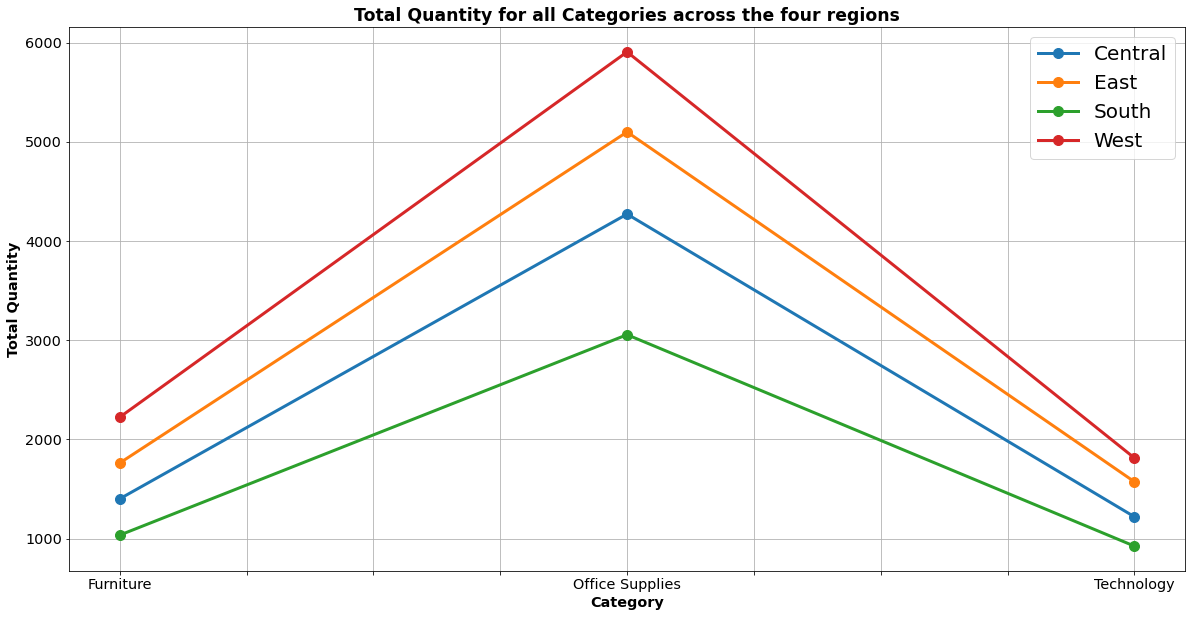

In [73]:
catdiscQ.unstack().plot(kind='line', figsize=(20,10), linewidth=3, marker='o', markersize=10)
plt.xticks( size='x-large')
plt.yticks( size='x-large')
#plt.axhline(y = 0, color = 'k', linestyle = 'dashed')

plt.xlabel('Category',weight='bold', size='x-large')
plt.ylabel('Total Quantity', weight='bold', size='x-large')
plt.title('Total Quantity for all Categories across the four regions', weight='bold', size='xx-large')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper right') # using a size in points
plt.show()

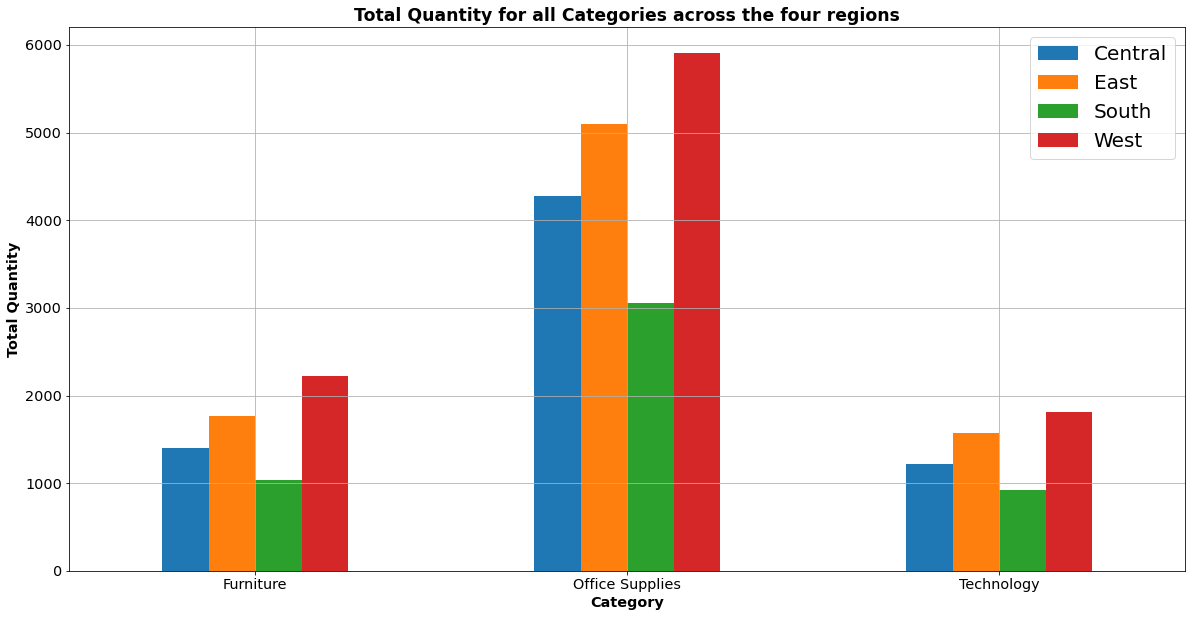

In [74]:
catdiscQ.unstack().plot(kind='bar', figsize=(20,10))
plt.xticks( rotation=0, size='x-large')
plt.yticks( size='x-large')
#plt.axhline(y = 0, color = 'k', linestyle = 'dashed')

plt.xlabel('Category',weight='bold', size='x-large')
plt.ylabel('Total Quantity', weight='bold', size='x-large')
plt.title('Total Quantity for all Categories across the four regions', weight='bold', size='xx-large')

#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper right') # using a size in points
plt.show()

In [75]:
#Profit for each year based each ship mode

shipmode_sales = data_no_missing.groupby(['Ord_year', 'Ship Mode'])['Profit'].sum()
shipmode_sales.unstack()

Ship Mode,First Class,Same Day,Second Class,Standard Class
Ord_year,,,,
2014,5415.0186,2230.5996,8077.2798,28084.5539
2015,6945.4813,1459.1860,11567.4105,31033.1701
2016,8947.4022,3971.0089,10115.9112,36808.0594
2017,11812.1647,2588.3741,17502.5354,38515.7069


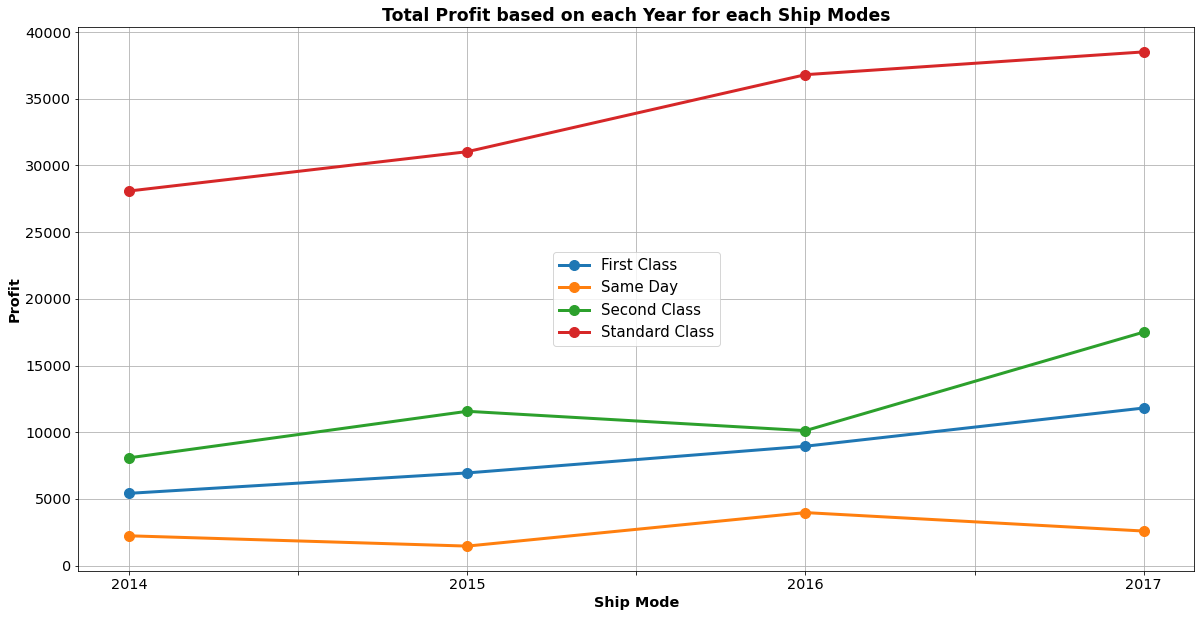

In [76]:
#Plot for Profit in each year based each ship mode

shipmode_sales.unstack().plot(kind='line', figsize=(20,10), linewidth=3, marker='o', markersize=10)
plt.xticks( size='x-large')
plt.yticks( size='x-large')
#plt.axhline(y = 0, color = 'k', linestyle = 'dashed')


plt.xlabel('Ship Mode',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit based on each Year for each Ship Modes', weight='bold', size='xx-large')


#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=15, loc='center') # using a size in points
plt.show()

In [77]:
#profit based on ship mode for each region

shipmode_profit = data_no_missing.groupby(['Ship Mode', 'Region'])['Profit'].sum()
shipmode_profit.unstack()

Region,Central,East,South,West
Ship Mode,,,,
First Class,3307.9786,11610.9031,5216.5931,12984.5920
Same Day,1121.6020,4713.0938,-1866.0912,6280.5640
Second Class,6763.4559,8377.3747,11961.1877,20161.1186
Standard Class,22901.4514,47772.2789,23454.6788,40313.0812


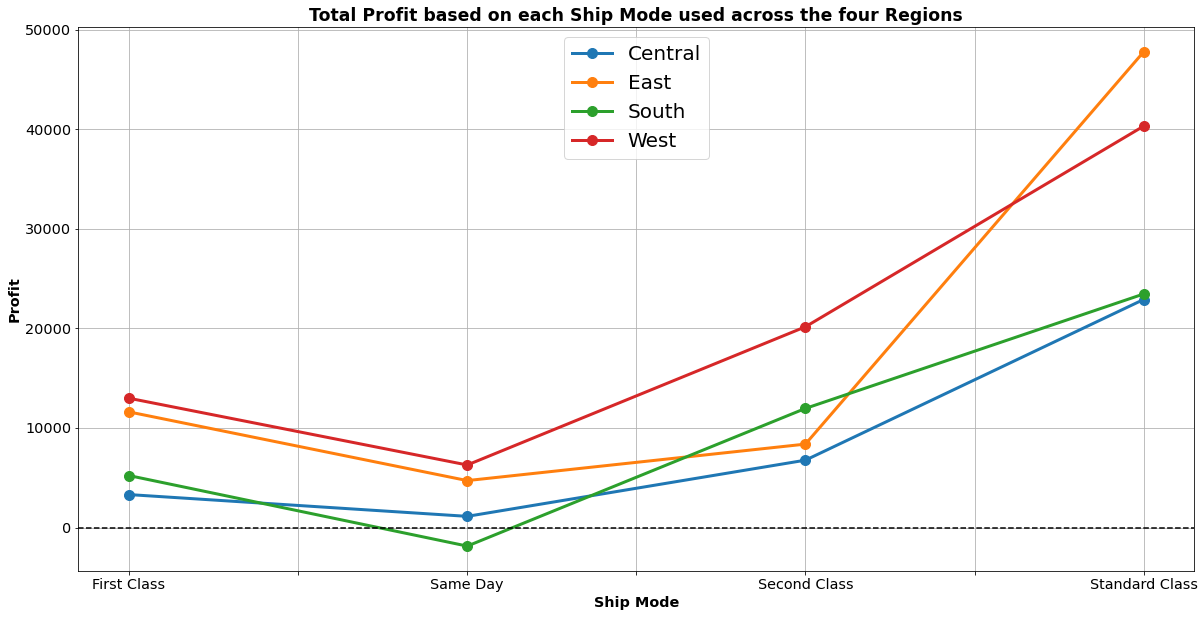

In [78]:
#plot for profit based on ship mode for each region

shipmode_profit.unstack().plot(kind='line', figsize=(20,10), linewidth=3, marker='o', markersize=10)
plt.xticks( size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')


plt.xlabel('Ship Mode',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit based on each Ship Mode used across the four Regions', weight='bold', size='xx-large')


#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()


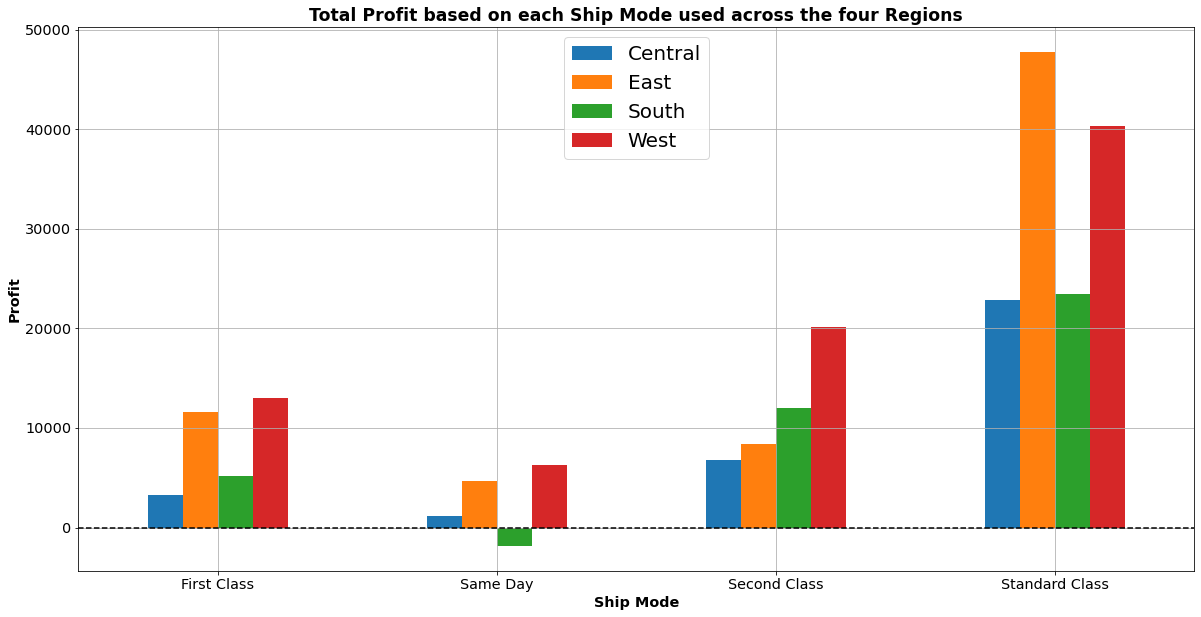

In [79]:
#plot for profit based on ship mode for each region

shipmode_profit.unstack().plot(kind='bar', figsize=(20,10))
plt.xticks( rotation=0,size='x-large')
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')


plt.xlabel('Ship Mode',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit based on each Ship Mode used across the four Regions', weight='bold', size='xx-large')


#plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper center') # using a size in points
plt.show()


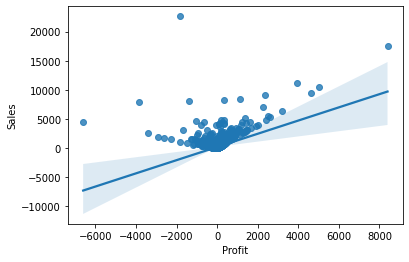

In [80]:
sns.regplot(x='Profit', y='Sales', data=data_no_missing)

In [81]:
data_no_missing.corr()

,Sales,Quantity,Discount,Profit,priceb4discount,Ord_day
Sales,1.000000,0.196896,-0.021971,0.414750,0.933894,0.002601
Quantity,0.196896,1.000000,0.013312,0.063334,0.170686,0.012320
Discount,-0.021971,0.013312,1.000000,-0.228720,0.072752,-0.001393
Profit,0.414750,0.063334,-0.228720,1.000000,0.114588,0.002053
priceb4discount,0.933894,0.170686,0.072752,0.114588,1.000000,-0.000148
Ord_day,0.002601,0.012320,-0.001393,0.002053,-0.000148,1.000000


In [82]:
data_no_missing

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,priceb4discount,Ord_year,Ord_month,Ord_day,Ord_day_of_week
1993,CA-2016-152156,2016-11-08,Second Class,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,261.96,2016,November,8,Tuesday
1994,CA-2016-152156,2016-11-08,Second Class,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,731.94,2016,November,8,Tuesday
1995,CA-2016-138688,2016-06-12,Second Class,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,14.62,2016,June,12,Sunday
1996,US-2015-108966,2015-10-11,Standard Class,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1741.05,2015,October,11,Sunday
1997,US-2015-108966,2015-10-11,Standard Class,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,27.96,2015,October,11,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2015-165743,2015-11-20,Second Class,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.6120,6,0.70,-7.3692,32.04,2015,November,20,Friday
9989,US-2017-105998,2017-11-03,First Class,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.7500,5,0.00,87.8900,199.75,2017,November,3,Friday
9990,US-2017-105998,2017-11-03,First Class,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.1840,12,0.20,20.9148,2091.48,2017,November,3,Friday
9991,US-2014-148194,2014-05-04,First Class,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.1800,7,0.00,3.8976,12.18,2014,May,4,Sunday


In [83]:
data_no_missing['planned_profit'] = data_no_missing['priceb4discount'] - (data_no_missing['Sales'] - data_no_missing['Profit'])

In [84]:
#data_no_missing.drop('initial_plannedProfit_b4_discount', axis=1, inplace=True)

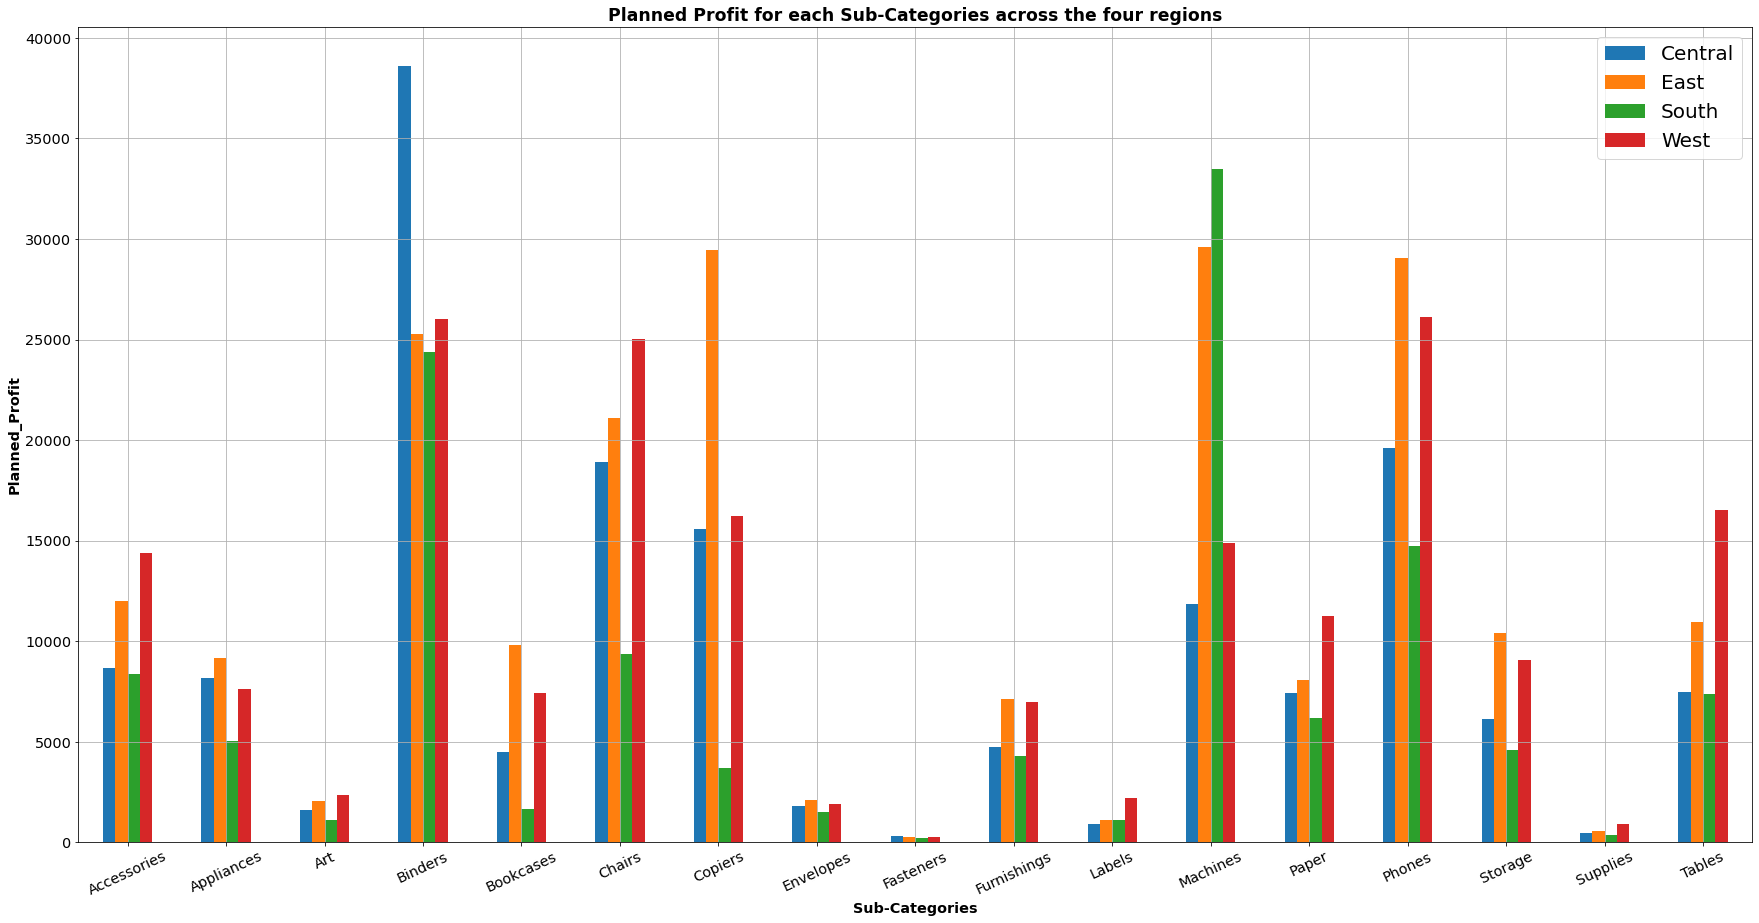

In [85]:
data_no_missing

planned_profit= data_no_missing.groupby(['Sub-Category', 'Region'])['planned_profit'].sum()
planned_profit.unstack().plot(kind='bar', figsize=(30,15))
plt.xticks(rotation=25, size='x-large')
plt.yticks( size='x-large')
#plt.axhline(y = 0, color = 'k', linestyle = 'dashed')

plt.xlabel('Sub-Categories',weight='bold', size='x-large')
plt.ylabel('Planned_Profit', weight='bold', size='x-large')
plt.title('Planned Profit for each Sub-Categories across the four regions', weight='bold', size='xx-large')

plt.legend(fontsize="xx-large")
plt.grid(True)
plt.legend(fontsize=20, loc='upper right') # using a size in points
plt.show()

In [86]:
southprof2 = data_no_missing[data_no_missing['Region']=='South']
southprof2.groupby('Sub-Category')['priceb4discount'].sum()

Sub-Category
Accessories    26084.73
Appliances     17044.05
Art             3662.11
Binders        51068.50
Bookcases       7986.57
Chairs         41378.71
Copiers         8699.76
Envelopes       3168.40
Fasteners        488.62
Furnishings    15009.38
Labels          2316.92
Machines       82653.13
Paper          12939.83
Phones         54236.59
Storage        31302.55
Supplies        8590.32
Tables         39896.36
Name: priceb4discount, dtype: float64

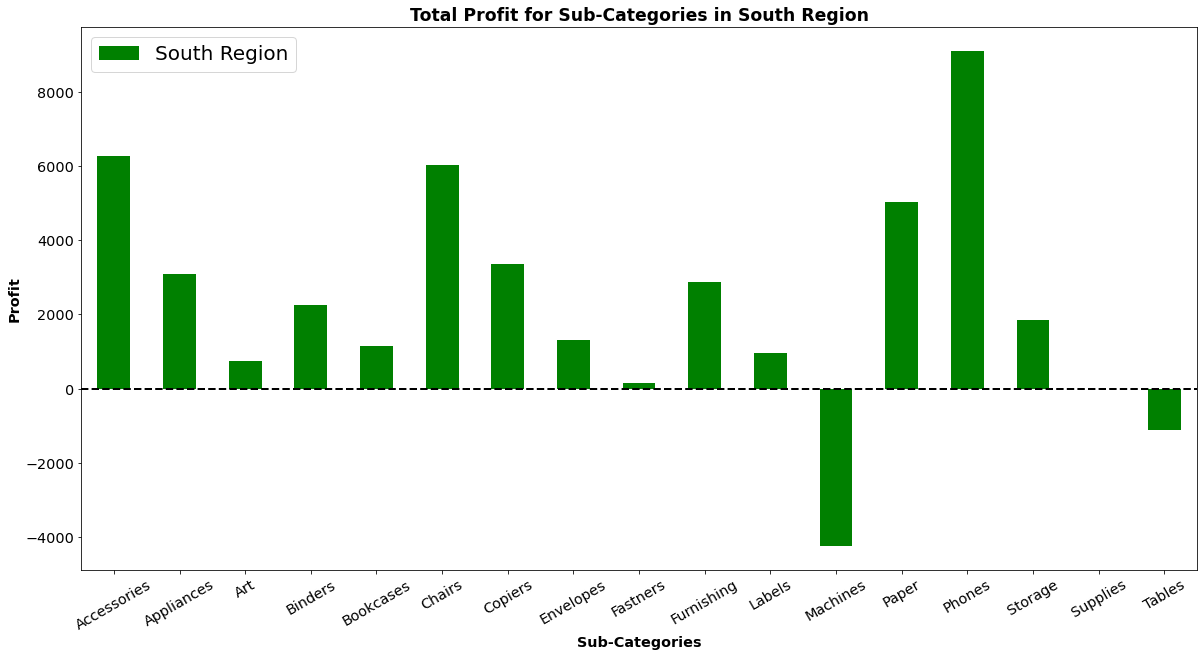

In [87]:
#

southprof = data_no_missing[data_no_missing['Region']=='South']
southprof.groupby('Sub-Category')['Profit'].sum().plot(kind='bar', figsize=(20,10), color='green', label='South Region')

plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), size='x-large', rotation=30)
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)



plt.xlabel('Sub-Categories',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit for Sub-Categories in South Region', weight='bold', size='xx-large')


#plt.legend(fontsize="xx-large")
#plt.grid(True)
plt.legend(fontsize=20, loc='upper left') # using a size in points
plt.show()

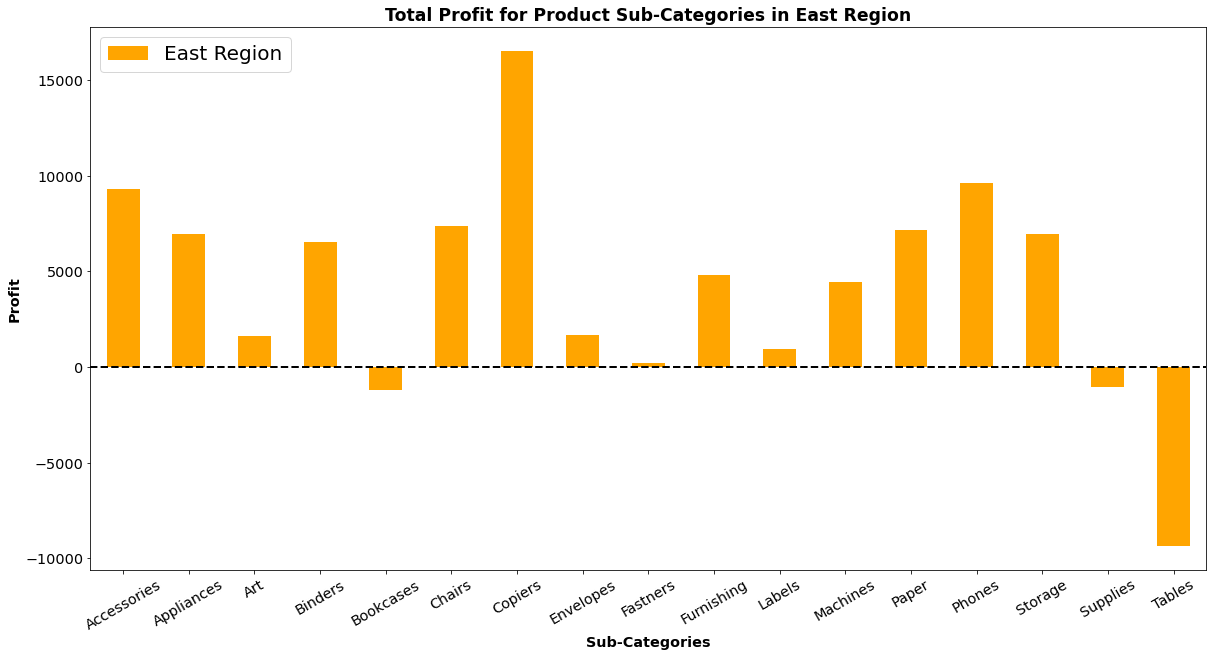

In [88]:
eastprof = data_no_missing[data_no_missing['Region']=='East']
eastprof.groupby('Sub-Category')['Profit'].sum().plot(kind='bar', figsize=(20,10), color='orange', label='East Region')

plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), size='x-large', rotation=30)
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)



plt.xlabel('Sub-Categories',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit for Product Sub-Categories in East Region', weight='bold', size='xx-large')


#plt.legend(fontsize="xx-large")
#plt.grid(True)
plt.legend(fontsize=20, loc='upper left') # using a size in points
plt.show()

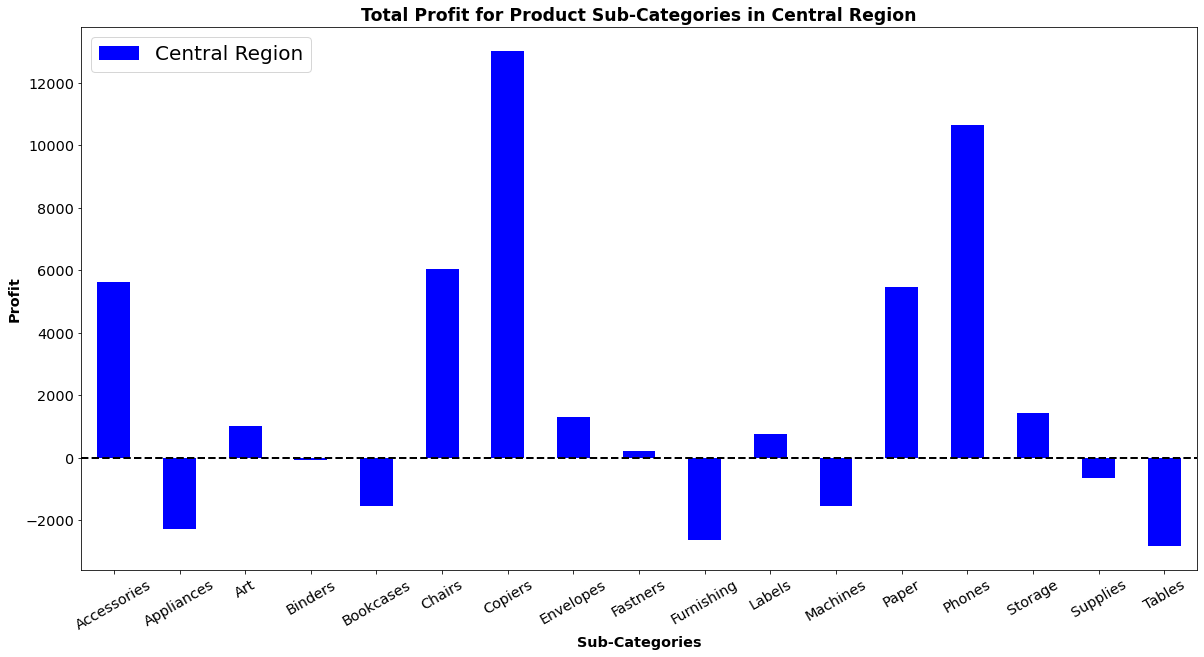

In [89]:
centralprof = data_no_missing[data_no_missing['Region']=='Central']
centralprof.groupby('Sub-Category')['Profit'].sum().plot(kind='bar', figsize=(20,10), color='b', label='Central Region')

plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), size='x-large', rotation=30)
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)



plt.xlabel('Sub-Categories',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit for Product Sub-Categories in Central Region', weight='bold', size='xx-large')


#plt.legend(fontsize="xx-large")
#plt.grid(True)
plt.legend(fontsize=20, loc='upper left') # using a size in points
plt.show()

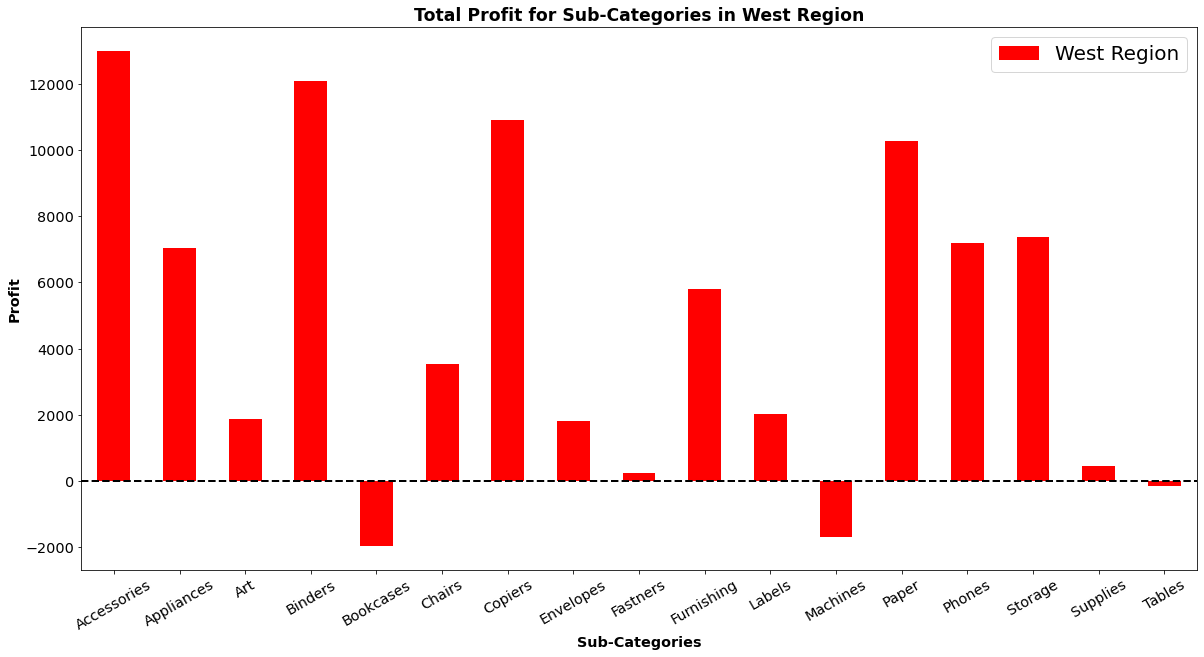

In [90]:
westprof = data_no_missing[data_no_missing['Region']=='West']
westprof.groupby('Sub-Category')['Profit'].sum().plot(kind='bar', figsize=(20,10), color='r', label='West Region')

plt.xticks(np.arange(17), ('Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fastners', 'Furnishing', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'), size='x-large', rotation=30)
plt.yticks( size='x-large')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)

plt.xlabel('Sub-Categories',weight='bold', size='x-large')
plt.ylabel('Profit', weight='bold', size='x-large')
plt.title('Total Profit for Sub-Categories in West Region', weight='bold', size='xx-large')

#plt.legend(fontsize="xx-large")
#plt.grid(True)
plt.legend(fontsize=20, loc='upper right') # using a size in points
plt.show()

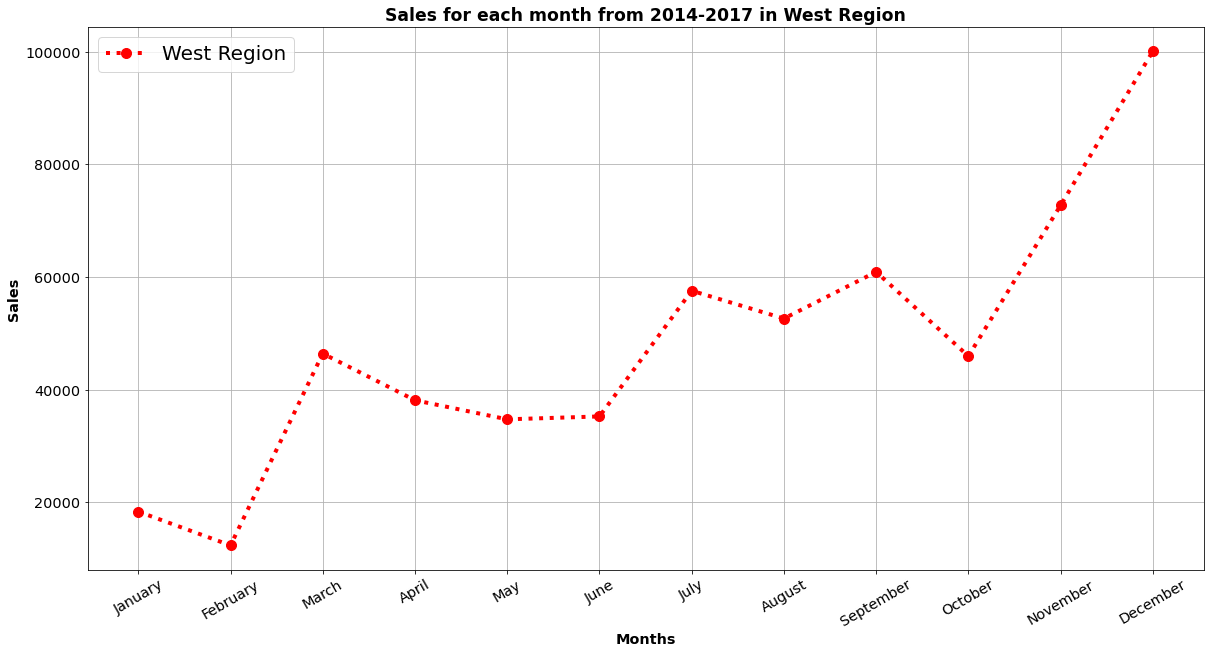

In [91]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

westprofm = data_no_missing[data_no_missing['Region']=='West']
westprofm = westprofm.groupby('Ord_month')['Sales'].sum()
westprofm = westprofm.reindex(month_dict, axis=0)
#print(westprofm)

westprofm.plot(kind='line', figsize=(20,10), marker='o',markersize=10, color='r', linewidth=4, linestyle='dotted', label='West Region')

plt.xticks(np.arange(12), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation=30, size='x-large', label='West Region')
plt.yticks(size='x-large')

plt.xlabel('Months',weight='bold', size='x-large')
plt.ylabel('Sales', weight='bold', size='x-large')

plt.grid(True)
plt.title('Sales for each month from 2014-2017 in West Region', weight='bold', size='xx-large')
plt.legend(fontsize=20, loc='upper left')
plt.show()

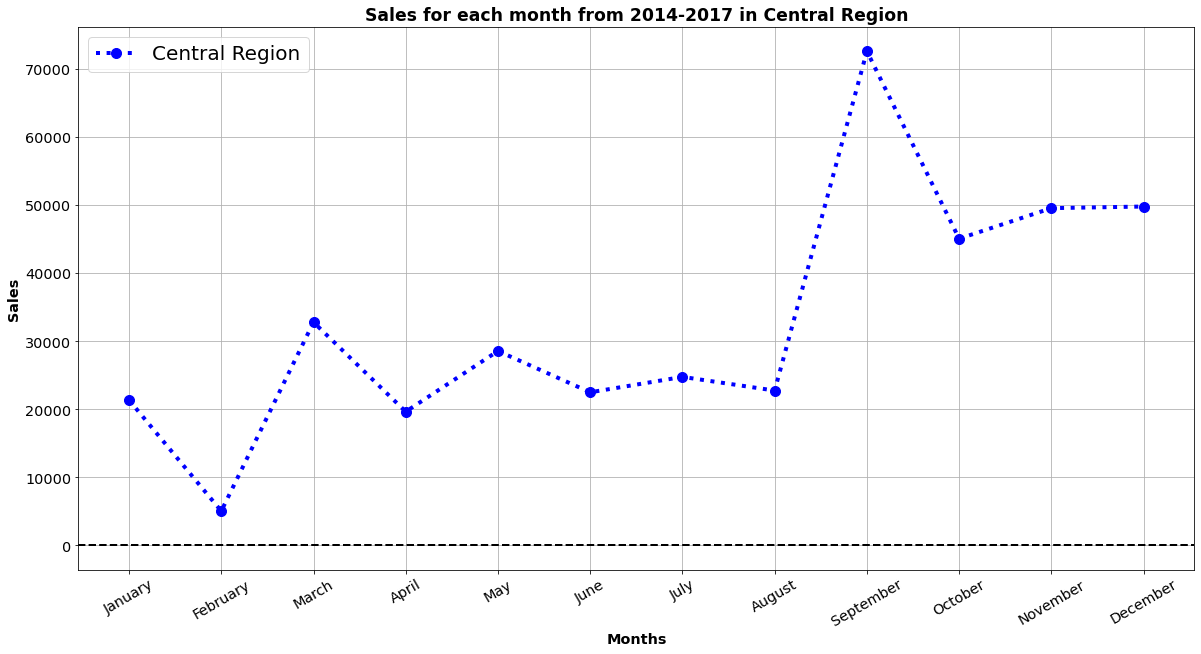

In [92]:


centralprofm = data_no_missing[data_no_missing['Region']=='Central']
centralprofm = centralprofm.groupby('Ord_month')['Sales'].sum()
centralprofm = centralprofm.reindex(month_dict, axis=0)
#print(centralprofm)

centralprofm.plot(kind='line', figsize=(20,10), marker='o', markersize=10, color='b', linewidth=4, linestyle='dotted', label='Central Region')

plt.xticks(np.arange(12), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation=30, size='x-large', label='Central Region')
plt.yticks(size='x-large')

plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)

plt.xlabel('Months',weight='bold', size='x-large')
plt.ylabel('Sales', weight='bold', size='x-large')

plt.grid(True)
plt.title('Sales for each month from 2014-2017 in Central Region', weight='bold', size='xx-large')
plt.legend(fontsize=20, loc='upper left')
plt.show()

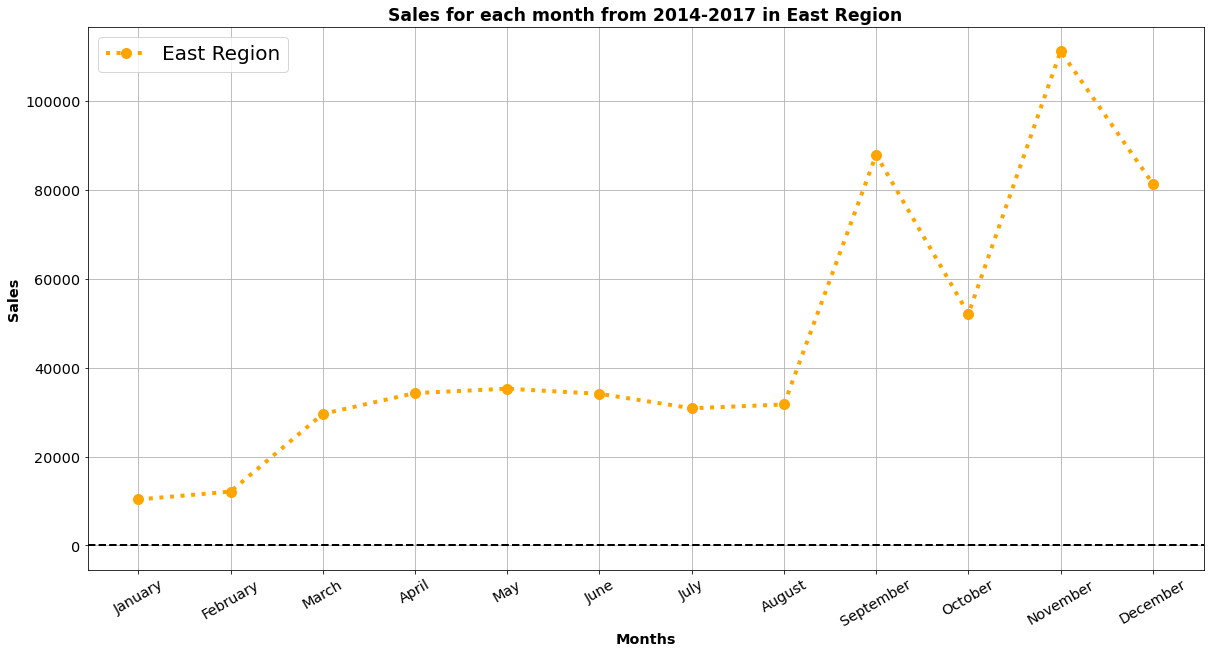

In [93]:
eastprofm = data_no_missing[data_no_missing['Region']=='East']
eastprofm = eastprofm.groupby('Ord_month')['Sales'].sum()
eastprofm = eastprofm.reindex(month_dict, axis=0)
#print(eastprofm)

eastprofm.plot(kind='line', figsize=(20,10), marker='o', markersize=10, color='orange', linewidth=4, linestyle='dotted', label='East Region')

plt.xticks(np.arange(12), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation=30, size='x-large', label='East Region')
plt.yticks(size='x-large')

plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)

plt.xlabel('Months',weight='bold', size='x-large')
plt.ylabel('Sales', weight='bold', size='x-large')

plt.grid(True)
plt.title('Sales for each month from 2014-2017 in East Region', weight='bold', size='xx-large')
plt.legend(fontsize=20, loc='upper left')
plt.show()

Ord_month
January      14454.2300
February     10741.3720
March        50539.9910
April        25332.2415
May          25273.9240
June         17865.3100
July         12335.6630
August       21468.1645
September    34990.3220
October      19625.3235
November     52012.8095
December     33295.4600
Name: Sales, dtype: float64


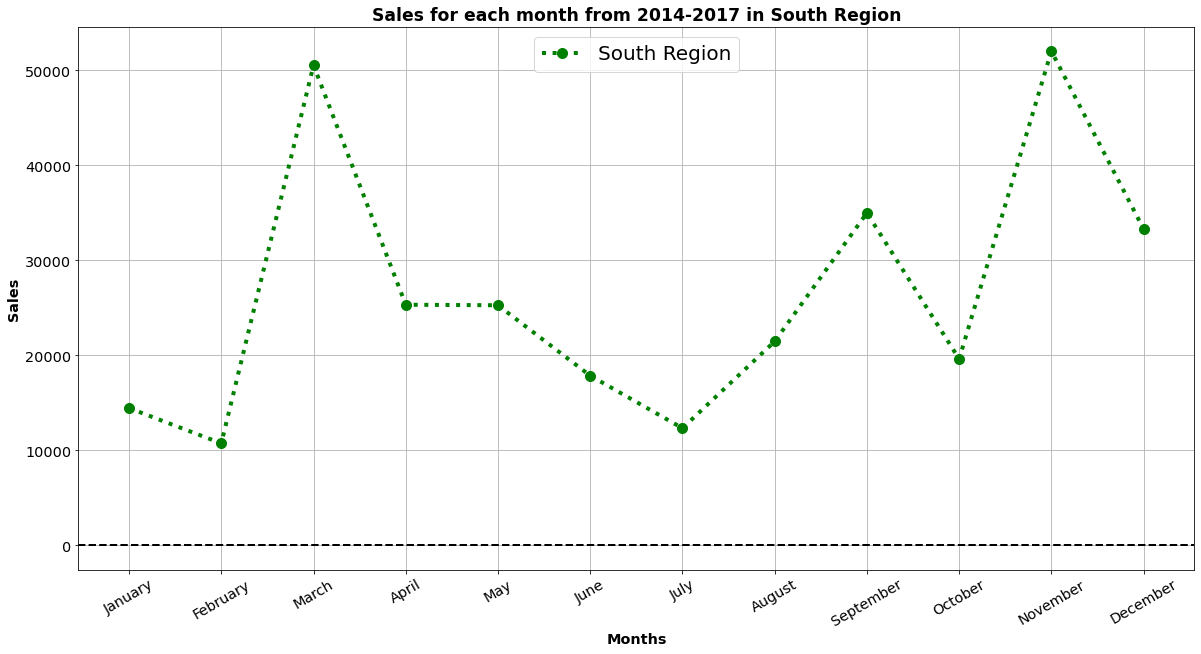

In [94]:
southprofm = data_no_missing[data_no_missing['Region']=='South']
southprofm = southprofm.groupby('Ord_month')['Sales'].sum()
southprofm = southprofm.reindex(month_dict, axis=0)
print(southprofm)
southprofm.plot(kind='line', figsize=(20,10), marker='o', markersize=10, color='g', linewidth=4, linestyle='dotted')

plt.xticks(np.arange(12), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation=30, size='x-large', label='South Region')
plt.yticks(size='x-large')

plt.xlabel('Months',weight='bold', size='x-large')
plt.ylabel('Sales', weight='bold', size='x-large')

plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=2)

plt.grid(True)
plt.title('Sales for each month from 2014-2017 in South Region', weight='bold', size='xx-large')
plt.legend(['South Region'], fontsize=20, loc='upper center')
plt.show()


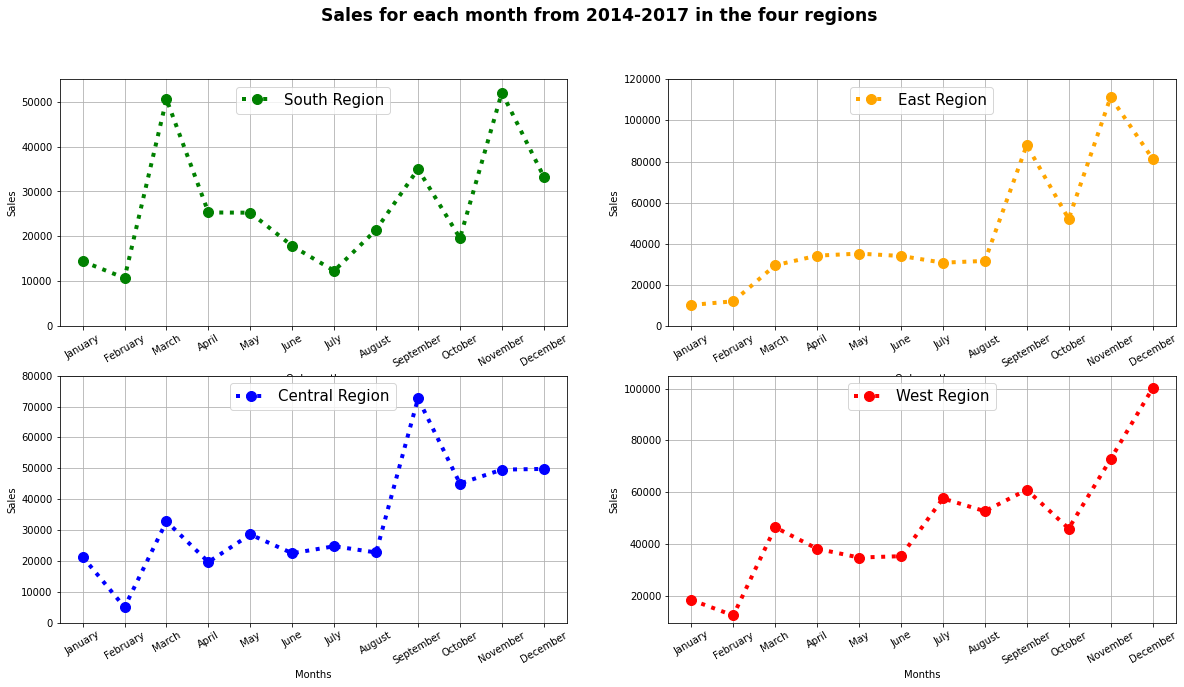

In [109]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Sales for each month from 2014-2017 in the four regions', weight='bold', size='xx-large')

x = range(0, 12)
labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#for south region
southprofm.plot(kind='line', figsize=(20,10), marker='o', markersize=10, color='g', linewidth=4, linestyle='dotted', ax=ax1)
ax1.set(ylabel='Sales', ylim=(0, 55000))

ax1.set_xticks(x)
ax1.set_xticklabels([labels[0+i] for i in x], rotation=30)

ax1.legend(['South Region'], fontsize=15, loc='upper center')
ax1.grid(True)


#For East Region
eastprofm.plot(kind='line', figsize=(20,10), marker='o', markersize=10, color='orange', linewidth=4, linestyle='dotted', ax=ax2)
ax2.set(ylabel='Sales', ylim=(0, 120000))

ax2.set_xticks(x)
ax2.set_xticklabels([labels[0+i] for i in x], rotation=30)

ax2.legend(['East Region'], fontsize=15, loc='upper center')
ax2.grid(True)


#for Central region
centralprofm.plot(kind='line', figsize=(20,10), marker='o', markersize=10, color='blue', linewidth=4, linestyle='dotted', label='East Region', ax=ax3)
ax3.set(xlabel= 'Months', ylabel='Sales', ylim=(0, 80000))

ax3.set_xticks(x)
ax3.set_xticklabels([labels[0+i] for i in x], rotation=30)

ax3.legend(['Central Region'], fontsize=15, loc='upper center')
ax3.grid(True)


#for West region
westprofm.plot(kind='line', figsize=(20,10), marker='o', markersize=10, color='red', linewidth=4, linestyle='dotted', label='East Region', ax=ax4)
ax4.set(xlabel= 'Months', ylabel='Sales', ylim=(9500, 105000))

ax4.set_xticks(x)
ax4.set_xticklabels([labels[0+i] for i in x], rotation=30)

ax4.legend(['West Region'], fontsize=15, loc='upper center')
ax4.grid(True)

plt.show()

range(1, 7)